In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Getting familiar with the dataset

## QUESTION 1 :Provide answers to the following questions

* 1.1 Overview: How many rows (samples) and columns (features) are present in the dataset?

* 1.2 Histograms: Plot 3 histograms on :

  (a) The total number of alpha-numeric characters per data point (row) in the feature full text: i.e count on the x-axis and frequency on the y-axis;

  (b) The column leaf label – class on the x-axis;

  (c) The column root label – class on the x-axis;


* 1.3 Interpret Plots: Provide qualitative interpretations of the histogram


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EE 219/Project1/Project1-ClassificationDataset.csv')

In [ ]:
#Visualize the database：
dataframe.head()

,full_text,summary,keywords,publish_date,authors,url,leaf_label,root_label
0,'Personalize Your NBA App Experience for the '...,'Personalize Your NBA App Experience for the '...,"['original', 'content', 'live', 'slate', 'game...",NaN,['Official Release'],https://www.nba.com/news/nba-app-new-features-...,basketball,sports
1,'Mike Will attends the Pre-GRAMMY Gala and GRA...,'Mike WiLL Made-It has secured a partnership w...,"['lead', 'espn', 'nbas', 'madeit', 'nba', 'lat...",2023-10-18 16:22:29+00:00,['Marc Griffin'],https://www.vibe.com/news/entertainment/mike-w...,basketball,sports
2,'The Golden State Warriors are struggling to f...,'The Golden State Warriors are struggling to f...,"['insider', 'york', 'thing', 'nbc', 'tag', 'nb...",NaN,[],https://www.nbcnewyork.com/tag/featured-nba/,basketball,sports
3,"'On Nov. 28, the NBA and Nike will collaborate...","'On Nov. 28, the NBA and Nike will collaborate...","['watch', 'telecast', 'ultimate', 'membership'...",NaN,['Official Release'],https://www.nba.com/news/watch-nba-games-ultim...,basketball,sports
4,'The NBA announced additions and innovations t...,'The NBA announced additions and innovations t...,"['experience', 'bring', 'media', 'crennan', 'n...",2023-10-17 12:00:17+00:00,"['Chris Novak', 'About Chris Novak']",https://awfulannouncing.com/tech/nba-app-2023-...,basketball,sports


### 1.1 Overview: How many rows (samples) and columns (features) are present in the dataset?


**Answer: 3476 rows (samples) and 8 columns (features) are present in the dataset.**

In [ ]:
print(dataframe.shape)

(3476, 8)


### 1.2(a) Plot the histogram on :


The total number of alpha-numeric characters per data point (row) in the feature full text: i.e count on the x-axis and frequency on the y-axis;

In [ ]:
#print(dataframe['full_text'].head(5))

In [ ]:
test_data=pd.DataFrame()
test_data['str_num'] = dataframe['full_text'].str.count(r"\w") #treat '\' as literal character
#test_data.head(5)

Text(0.5, 1.0, '1.2(a): full text feature ')

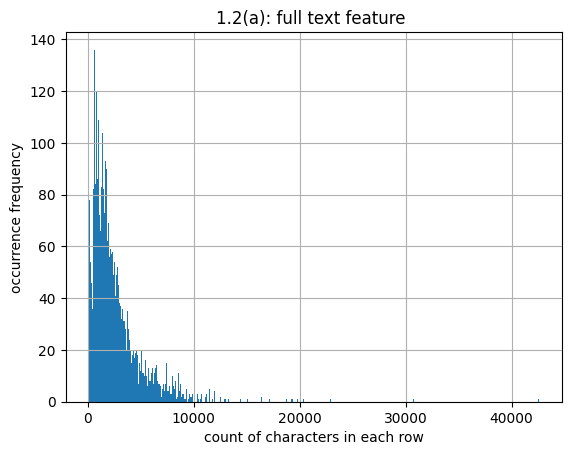

In [ ]:
test_data.hist(bins=500)
plt.xlabel("count of characters in each row")
plt.ylabel("occurrence frequency")
plt.title("1.2(a): full text feature ")

### 1.2(b) Histograms:


 Plot histograms on the column leaf label – class on the x-axis;

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'basketball'),
  Text(1, 0, 'baseball'),
  Text(2, 0, 'tennis'),
  Text(3, 0, 'football'),
  Text(4, 0, 'soccer'),
  Text(5, 0, 'forest fire'),
  Text(6, 0, 'flood'),
  Text(7, 0, 'earthquake'),
  Text(8, 0, 'drought'),
  Text(9, 0, 'heatwave')])

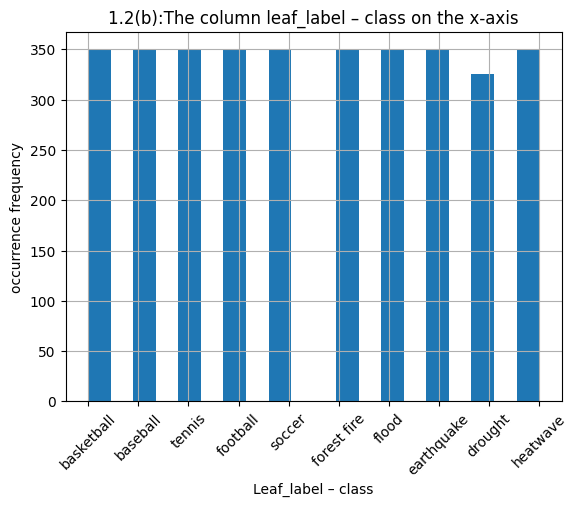

In [ ]:
dataframe['leaf_label'].hist(bins=20)
plt.title("1.2(b):The column leaf_label – class on the x-axis")
plt.xlabel("Leaf_label – class")
plt.ylabel("occurrence frequency")
plt.xticks(rotation=45)

### 1.2(c)  Histogram


The column root label – class on the x-axis.

([0, 1], [Text(0, 0, 'sports'), Text(1, 0, 'climate')])

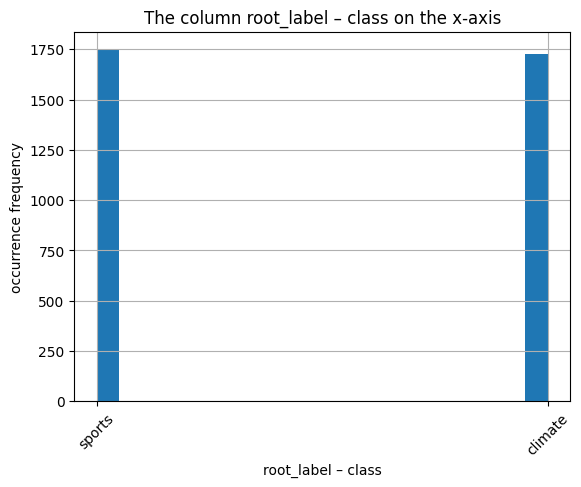

In [ ]:
dataframe['root_label'].hist(bins=20)
plt.title("The column root_label – class on the x-axis")
plt.xlabel("root_label – class")
plt.ylabel("occurrence frequency")
plt.xticks(rotation=45)

### 1.3 Interpret Plots: Provide qualitative interpretations of the histograms.

**Answer:  The histograms illustrate a well-balanced distribution of data across the topics of sports and climate, with a relatively even distribution observed in the leaf labels. Additionally, the majority of alpha-numeric character lengths in the feature "full_test" fall within the 0-10,000 range. However, a smaller portion of the data is distributed in the 10,000-40,000 range, which suggests that the dataset exhibits characteristics of a long-tail distribution.**

# Splitting the entire dataset into training and testing data


## QUESTION 2: Report the number of training and testing samples.
**Answer: training:2780; testing:696**

In [ ]:
import numpy as np
import random
np.random.seed(42)
random.seed(42)

### 1.Splitting the entire dataset into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
train_raw, test_raw = train_test_split(dataframe[['full_text','root_label','leaf_label']],test_size=0.2, random_state=42)
train, test = train_test_split(dataframe[['full_text','root_label','leaf_label']],test_size=0.2, random_state=42)
print(f"train:{train.shape},test:{test.shape}")

train:(2780, 3),test:(696, 3)


# 2. Feature Extraction




Use the following specs to extract features from the textual data:

* Before doing anything, please clean each data sample using the code block provided above.This function helps remove many but not all HTML artefacts from the crawler’s output. You can also build your own cleaning module if you find this function to be ineffective.


* Exclude terms that are numbers (e.g. “123”, “-45”, “6.7” etc.)

In [ ]:
import re
def clean(text):
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    texter = re.sub(r"<br />", " ", text)
    texter = re.sub(r"&quot;", "\"",texter)
    texter = re.sub('&#39;', "\"", texter)
    texter = re.sub('\n', " ", texter)
    texter = re.sub(' u '," you ", texter)
    texter = re.sub('`',"", texter)
    texter = re.sub(' +', ' ', texter)
    texter = re.sub(r"(!)\1+", r"!", texter)
    texter = re.sub(r"(\?)\1+", r"?", texter)
    texter = re.sub('&amp;', 'and', texter)
    texter = re.sub('\r', ' ',texter)
    clean = re.compile('<.*?>')
    texter = texter.encode('ascii', 'ignore').decode('ascii')
    texter = re.sub(clean, '', texter)
    texter = re.sub(r'\b\d+\b', '', texter)#
    if texter == "":
        texter = ""
    return texter


#clean the database
cleaned_data=pd.DataFrame()
cleaned_data['cleaned_full_text']=dataframe['full_text'].apply(clean)
#using the apply method to remove all numbers in the database:
cleaned_data['cleaned_full_text'] = cleaned_data['cleaned_full_text'].apply(lambda x: re.sub(r'\b\d+\b', '', x))
#cleaned_data['cleaned_full_text']

### Perform lemmatization with nltk.wordnet.WordNetLemmatizer and pos tag

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
#The lemmatizer is actually pretty complicated, it needs Parts of Speech (POS) tags
from nltk import pos_tag
# nltk.download('punkt',download_dir='D:/nltk_data')#, if you need "tokenizers/punkt/english.pickle", choose it
# nltk.download('averaged_perceptron_tagger',download_dir='D:/nltk_data')
wnl = nltk.wordnet.WordNetLemmatizer()
walking_tagged = pos_tag(nltk.word_tokenize('I am walking to school'))
print(walking_tagged)
print("mapping to Verb, Noun, Adjective, Adverbial")

# first you clean
# you break up the document into sentences
# you pass each sentence into the pos tagger
def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag))
            for word, tag in pos_tag(list_word)]

cleaned_data['cleaned_full_text']=lemmatize_sent(cleaned_data['cleaned_full_text'])
#cleaned_data['cleaned_full_text']

[('I', 'PRP'), ('am', 'VBP'), ('walking', 'VBG'), ('to', 'TO'), ('school', 'NN')]
mapping to Verb, Noun, Adjective, Adverbial


* Use the “english” stopwords of the CountVectorizer
* Use min df=3

In [ ]:
import nltk
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from collections import defaultdict

# pos_tags: treebank to wordnet
tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

wnl = WordNetLemmatizer()

def lemmatize(data):
    lemmatized = []
    for doc in data:
        tokens = word_tokenize(doc)
        words = [wnl.lemmatize(word, tag_map[tag[0]]) for word,tag in pos_tag(tokens)
                 if wnl.lemmatize(word, tag_map[tag[0]]).isalpha()]
        sentence = ' '.join(words)
        lemmatized.append(sentence)
    return lemmatized
cleaned_data['cleaned_full_text']=lemmatize(cleaned_data['cleaned_full_text'])



In [ ]:
cleaned_data

,cleaned_full_text
0,your nba app experience for the season new yor...
1,will attend the gala and grammy salute to indu...
2,golden state warrior be struggle to find their...
3,the nba and nike will collaborate to deliver a...
4,nba announce addition and innovation to the nb...
...,...
3471,virginia department of forestry continue to ba...
3472,alabama alaska arizona arkansas california col...
3473,showcase technological strength at expo copyri...
3474,wv today partly cloudy sky this evening will b...


In [ ]:
#Using the Bag-of-Words(BOW) model
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english',min_df=3)
bow_feature_matrix = vectorizer.fit_transform(cleaned_data['cleaned_full_text'] )
#cleaned_data['cleaned_full_text'] .shape#:(3476,)
#bow_feature_matrix.shape:(3476, 19477)

In [ ]:
#Using the Term Frequency-Inverse Document Frequency(TF-IDF) Model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english',min_df=3)
tfidf_feature_matrix=tfidf_vectorizer.fit_transform(cleaned_data['cleaned_full_text'] )
tfidf_feature_matrix.shape

(3476, 14653)

## QUESTION 3:

### Please answer the following questions:


* (a) What are the pros and cons of lemmatization versus stemming? How do these processes affect the dictionary siez?

  **Answer: Lemmatization is advantageous as it delivers accurate results, preserves word meanings, and produces valid words. However, it comes with the drawback of being computationally intensive and may necessitate the use of part-of-speech tags. On the other hand, stemming is computationally efficient but may sacrifice accuracy and is not suitable for semantic analysis.**

  **In terms of dictionary size, both lemmatization and stemming contribute to reduction. While lemmatization has a minimal impact on dictionary size, stemming significantly decreases it by consolidating words with similar stems.**

* (b) min_df means minimum document frequency. How does varying min_df change the TF-IDF matrix?

  **Answer: A higher min_df in TF-IDF excludes terms with low document frequency, deeming them less important or specific to particular documents. This leads to a smaller TF-IDF matrix that emphasizes common terms across documents. In contrast, a lower min_df results in a broader vocabulary that includes terms with lower document frequency. The TF-IDF matrix becomes larger, encompassing more terms, and exhibits increased sensitivity to specific terms present in certain documents but occurring less frequently overall. The choice of min_df thus influences the balance between commonality and specificity in the representation of text data.**

  
* (c) Should I remove stopwords before or after lemmatizing? Should I remove punctuatins before or after lemmatizing? Should I remove numbers before or after lemmatizig?

  **We should remove all of these before lemmatizing. The goal is to preprocess the text in a way that retains meaningful information for lemmatization while removing non-essential elements that may introduce noise. These terms in the context is not very informative.**


* (d) Report  the shape of the TF-IDF-processed train and test matrices. The number of rows should match the results of Question2. This dimension will vary depending on your exact mecleaning and lemmatizing and that is okay.

  **Answer:train_matrix(2780, 12784),test_matrix:(696,12784)**



In [ ]:
cleaned_data['root_label'] = dataframe['root_label']
cleaned_data['leaf_label'] = dataframe['leaf_label']
cleaned_data['cleaned_keywords']=dataframe['keywords']
train, test = train_test_split(cleaned_data[['cleaned_full_text','root_label','leaf_label']],test_size=0.2, random_state=42)
print(f"train:{train.shape},test:{test.shape}")

train:(2780, 3),test:(696, 3)


In [ ]:
train_matrix=tfidf_vectorizer.fit_transform(train['cleaned_full_text'])
test_matrix=tfidf_vectorizer.transform(test['cleaned_full_text'])
print(f"train_matrix:{train_matrix.shape},test_matrix:{test_matrix.shape}")

train_matrix:(2780, 12784),test_matrix:(696, 12784)


In [ ]:
test

,cleaned_full_text,root_label,leaf_label
2069,a small patch of snow on the ground in douai i...,climate,forest fire
1425,zago of brazil put on a jersey during a signin...,sports,soccer
309,york the la vega ace become the first team in ...,sports,basketball
2270,connecticut medium over four inch of rain fell...,climate,flood
3037,city of watertown be currently under a water e...,climate,drought
...,...,...,...
547,tx today period of rain low wind ne at to mph ...,sports,baseball
776,atp finals the final tennis championship of ge...,sports,tennis
2873,the regulation direct how the state conserve w...,climate,drought
2236,week of infighting and turmoil that have leave...,climate,flood


# Dimensionality Reduction

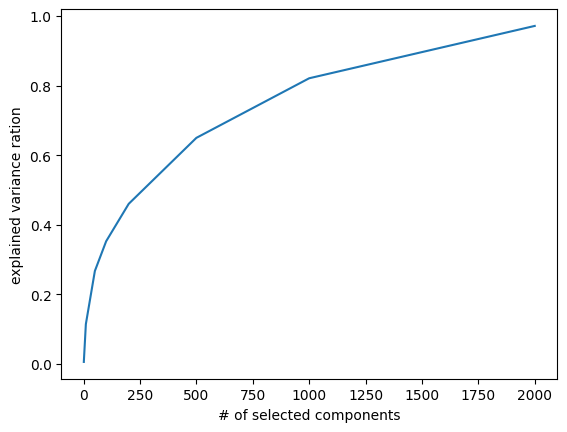

In [ ]:
from sklearn.decomposition import TruncatedSVD
# Latent Semantic Indexing
class Dimension_reduction(object):
    def plot_LSI(self,n_components):
        random_seed=42
        x_axis=[]
        y_axis=[]
        for item in n_components:

            LSI_Model = TruncatedSVD(n_components=item, random_state=random_seed)
            LSI_Model.fit_transform(tfidf_feature_matrix)
            #print(item,sum(LSI_Model.explained_variance_ratio_))
            x_axis.append(item)
            y_axis.append(sum(LSI_Model.explained_variance_ratio_))
            #plt.plot(item,sum(LSI_Model.explained_variance_ratio_))
        plt.plot(x_axis,y_axis)
        plt.xlabel("# of selected components")
        plt.ylabel("explained variance ration")
        plt.show()
Task = Dimension_reduction()
Task.plot_LSI([1,10,50,100,200,500,1000,2000])

## QUESTION 4: Reduce the dimensionality of the data using the methods above:

* (a)Plot the explained variance ratio across multiple different k = [1,10,50,100,200,500,1000,2000] for LSI and for the next few sections choose k = 50. What does the explained variance ratio plot look like? What does the plot’s concavity suggest?

    **Answer:The explained variance ration plot looks like a log function. The explained varience ratio increases as the k increase, finally the explained variance ratio will up to one. The concave shape of the explained variance ratio plot, indicative of a negative second derivative, implies that as dimensionality (k) decreases, the rate at which the variance decreases increases. In simpler terms, each subtracted dimension brings more information lost. It suggests finding an optimal point where the trade-off between dimensionality reduction and explained variance is favorable. For example,a plateau region indicates that increasing k may not significantly enhance the model's ability.**

* (b)With k = 50 found in the previous sections, calculate the reconstruction residual MSE error when using LSI and NMF – they both should use the same k = 50. Which one is larger, the $||X-WH||_F^2$ in NMF or the $||X-U_k Σ_k V_k||_F^2$ in LSI and why?

    **Answer:**\
    **$||X-U_k Σ_k V_k||_F^2$ in LSI: 1949.3965389967152** \
    **$||X-WH||_F^2$ in NMF: 1976.750096952166** \
    **The MSE error in NMF is larger. This is because the LSI method considers the semantic indexings in the dimension reduction progress. It fused the topics to reduced the dimension in the semantic background so it performs better in textual dataset.**

In [ ]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

# Latent Semantic Indexing
lsi = TruncatedSVD(n_components=50, random_state=42)
X_train_LSI = lsi.fit_transform(train_matrix)
##X_test_LST = lsi.fit_transform(test_matrix)
X_test_LSI = lsi.transform(test_matrix)

print(f"X_train_LSI:{X_train_LSI.shape},train_matrix:{train_matrix.shape}")
USigmaVt = lsi.inverse_transform(X_train_LSI)
LSI_frobenius = np.sum(np.array(train_matrix - USigmaVt)**2)
print("Squared Frobenius Norm for LSI: " + str(LSI_frobenius))

X_train_LSI:(2780, 50),train_matrix:(2780, 12784)
Squared Frobenius Norm for LSI: 1949.3965389967152


In [ ]:
# Non-negativee Matrix Factorization
from sklearn.decomposition import NMF

nmf = NMF(n_components=50, random_state=42)
X_train_NMF = nmf.fit_transform(train_matrix)
#X_test_NMF = nmf.transform(train_matrix)
print(f"X_train_LSI:{X_train_NMF.shape},train_matrix:{train_matrix.shape}")
WH = np.dot(X_train_NMF, nmf.components_)
NMF_frobenius = np.sum(np.array(train_matrix - WH)**2)
print("Squared Frobenius Norm for NMF: " + str(NMF_frobenius))

X_train_LSI:(2780, 50),train_matrix:(2780, 12784)
Squared Frobenius Norm for NMF: 1976.7500969521652


# Classification Algorithm


## QUESTION 5: Compare and contrast hard-margin and soft-margin linear SVMs:
* (a) train two linear SVMs:

  - Train one SVM with γ = 1000 (hard margin), another with γ = 0.0001 (soft margin).

  - Plot the ROC curve, report the confusion matrix and calculate the accuracy, recall, precision and F-1 score of both SVM classifiers on the testing set. Which one performs better? What about for γ = 100000?

    **Answer: Hard margin SVM performs much better than the soft margin SVM, if γ = 100000, the performance of hard margin SVM is similar to γ = 1000.**

  - What happens for the soft margin SVM? Why is the case? Analyze in terms of the confusion matrix.

    **Answer:The classification metrics of soft margin SVM are much lower than the hard margin SVM. From the confusion matrix we can know that the numbers of True Negative and False Positive are zero. This is to say that the soft margin SVM predicts all instances as positive instances. This Support Vector Machine can not classify negative instances correctly.**

  - Does the ROC curve reflect the performance of the soft-margin SVM? Why?

    **Answer: Yes, it shows that the soft-margin SVM is very lenient with classification error.**

In [ ]:
train['root_label']

2677    climate
1204     sports
2955    climate
2266    climate
611      sports
         ...   
1095     sports
1130     sports
1294     sports
860      sports
3174    climate
Name: root_label, Length: 2780, dtype: object

In [ ]:
#binary class
from sklearn.svm import SVC

Y_train_binary = pd.DataFrame()
label_mapping = {'sports': 1, 'climate': 0}
Y_train_binary['root_label'] = train.root_label.map(label_mapping)
Y_train_binary = Y_train_binary.squeeze()

Y_test_binary = pd.DataFrame()
label_mapping = {'sports': 1, 'climate': 0}
Y_test_binary['root_label'] = test.root_label.map(label_mapping)
Y_test_binary = Y_test_binary.squeeze()

In [ ]:
Y_test_binary.shape

(696,)

In [ ]:
#Train two linear SVMs
svm_hard = SVC(C=1000, kernel='linear', random_state=42)
svm_hard.fit(X_train_LSI, Y_train_binary)

svm_soft = SVC(C=0.0001, kernel='linear', random_state=42)
svm_soft.fit(X_train_LSI, Y_train_binary)

svm_harder = SVC(C=100000, kernel='linear', random_state=42)
svm_harder.fit(X_train_LSI, Y_train_binary)

Y_test_prob_hard = svm_hard.decision_function(X_test_LSI)
Y_test_label_hard = svm_hard.predict(X_test_LSI)
Y_test_prob_soft = svm_soft.decision_function(X_test_LSI)
Y_test_label_soft = svm_soft.predict(X_test_LSI)
Y_test_prob_harder = svm_harder.decision_function(X_test_LSI)
Y_test_label_harder = svm_harder.predict(X_test_LSI)

Hard Margin Linear SVMs:
confusion_matrix:
[[315  13]
 [ 15 353]]
accuracy:0.9597701149425287
recall:0.9592391304347826
precision:0.9644808743169399
f1_score:0.9618528610354223


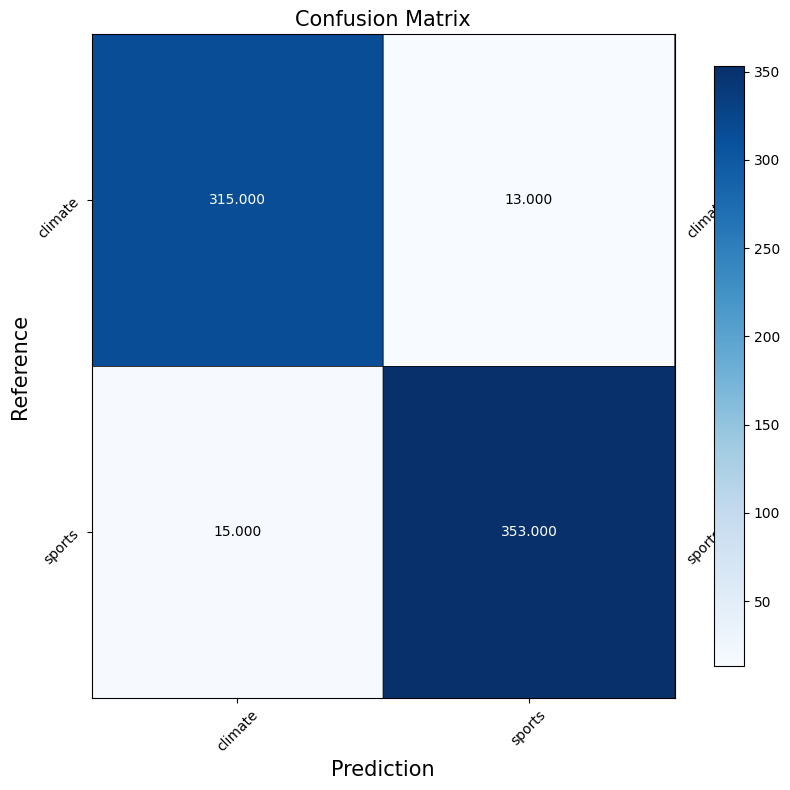



Soft Margin Linear SVMs:
confusion_matrix:
[[328   0]
 [368   0]]
accuracy:0.47126436781609193
recall:0.0
precision:0.0
f1_score:0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


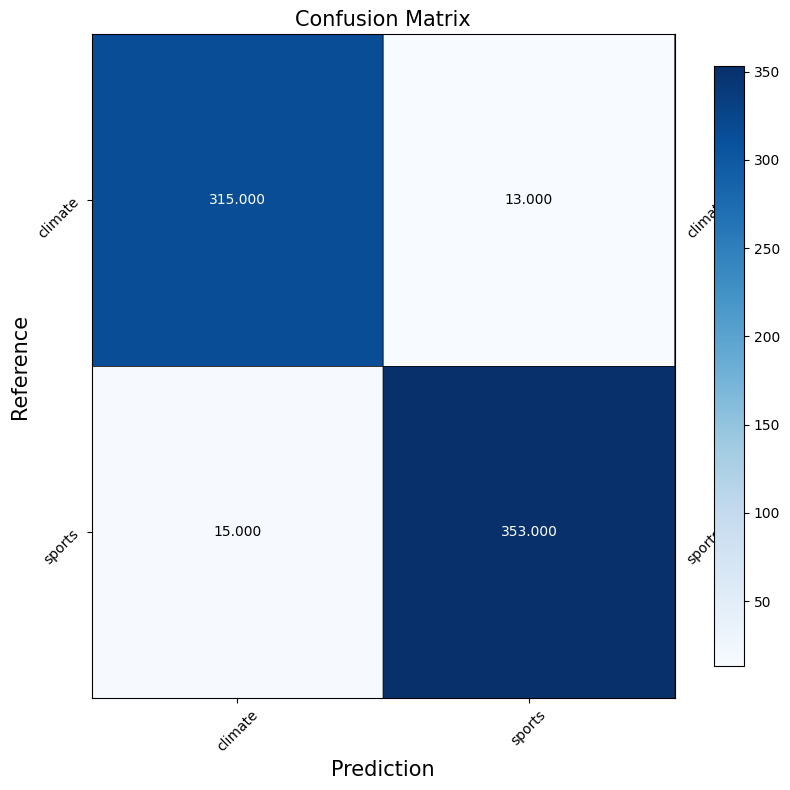



Harder Margin Linear SVMs:
confusion_matrix:
[[317  11]
 [ 16 352]]
accuracy:0.9612068965517241
recall:0.9565217391304348
precision:0.9696969696969697
f1_score:0.9630642954856361


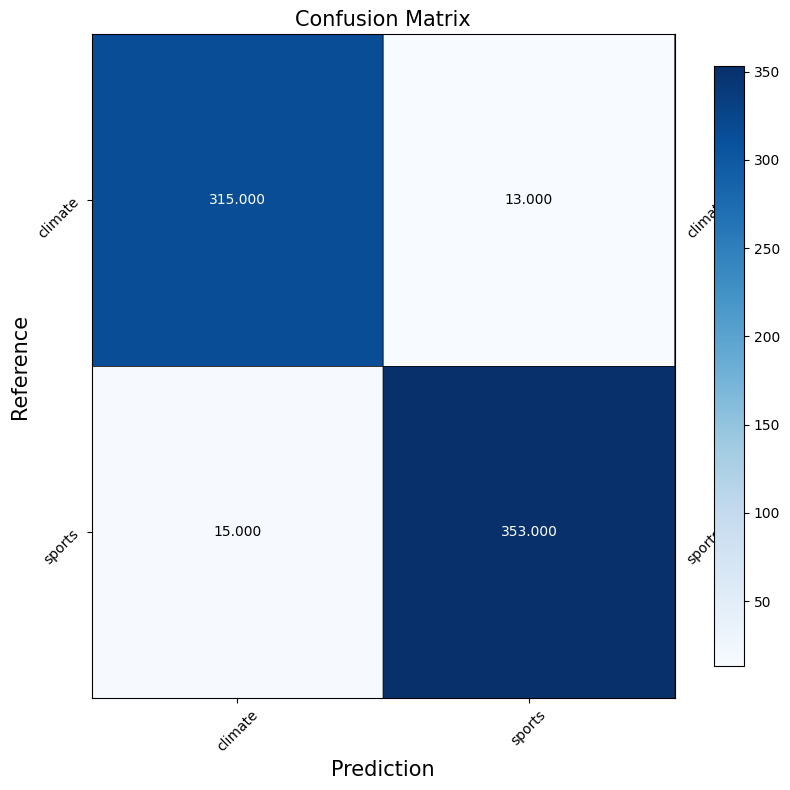

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
def plot_mat(mat, xticklabels = None, yticklabels = None, pic_fname = None, size=(-1,-1), if_show_values = True,
             colorbar = True, grid = 'k', xlabel = "Prediction", ylabel = "Reference", title = "Confusion Matrix", vmin=None, vmax=None):
    if size == (-1, -1):
        size = (mat.shape[1] / 3, mat.shape[0] / 3)

    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(1,1,1)

    # im = ax.imshow(mat, cmap=plt.cm.Blues)
    im = ax.pcolor(mat, cmap=plt.cm.Blues, linestyle='-', linewidth=0.5, edgecolor=grid, vmin=vmin, vmax=vmax)

    if colorbar:
        plt.colorbar(im,fraction=0.046, pad=0.06)
    # tick_marks = np.arange(len(classes))
    # Ticks
    lda_num_topics = mat.shape[0]
    nmf_num_topics = mat.shape[1]
    yticks = np.arange(lda_num_topics)
    xticks = np.arange(nmf_num_topics)
    ax.set_xticks(xticks + 0.5)
    ax.set_yticks(yticks + 0.5)
    if xticklabels is None:
        xticklabels = [str(i) for i in xticks]
    if yticklabels is None:
        yticklabels = [str(i) for i in yticks]
    ax.set_xticklabels(xticklabels, rotation=45)
    ax.set_yticklabels(yticklabels, rotation=45)

    # Minor ticks
    # ax.set_xticks(xticks, minor=True);
    # ax.set_yticks(yticks, minor=True);
    # ax.set_xticklabels([], minor=True)
    # ax.set_yticklabels([], minor=True)

    # ax.grid(which='minor', color='k', linestyle='-', linewidth=0.5)

    # tick labels on all four sides
    ax.tick_params(labelright = True, labeltop = False)

    if ylabel:
        plt.ylabel(ylabel, fontsize=15)
    if xlabel:
        plt.xlabel(xlabel, fontsize=15)
    if title:
        plt.title(title, fontsize=15)

    # im = ax.imshow(mat, interpolation='nearest', cmap=plt.cm.Blues)
    ax.invert_yaxis()

    # thresh = mat.max() / 2

    def show_values(pc, fmt="%.3f", **kw):
        pc.update_scalarmappable()
        ax = pc.axes
        for p, color, value in itertools.zip_longest(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            if np.all(color[:3] > 0.5):
                color = (0.0, 0.0, 0.0)
            else:
                color = (1.0, 1.0, 1.0)
            ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw, fontsize=10)

    if if_show_values:
        show_values(im)
    # for i, j in itertools.product(range(mat.shape[0]), range(mat.shape[1])):
    #     ax.text(j, i, "{:.2f}".format(mat[i, j]), fontsize = 4,
    #              horizontalalignment="center",
    #              color="white" if mat[i, j] > thresh else "black")

    plt.tight_layout()
    if pic_fname:
        plt.savefig(pic_fname, dpi=300, transparent=True)
    plt.show()
    plt.close()



def calculate_metrics(Y_label, Y_predict, label_list, title):
  mat = confusion_matrix(Y_test_binary, Y_test_label_hard)
  print(f"{title}:")
  print(f"confusion_matrix:\n{confusion_matrix(Y_label, Y_predict)}")
  print(f"accuracy:{accuracy_score(Y_label, Y_predict)}")
  print(f"recall:{recall_score(Y_label, Y_predict)}")
  print(f"precision:{precision_score(Y_label, Y_predict)}")
  print(f"f1_score:{f1_score(Y_label, Y_predict)}")
  plot_mat(mat, xticklabels = label_list, yticklabels = label_list, size=(8, 8))
  print(f"\n")

label_list = ["climate", "sports"]

calculate_metrics(Y_test_binary, Y_test_label_hard, label_list, "Hard Margin Linear SVMs")
calculate_metrics(Y_test_binary, Y_test_label_soft, label_list, "Soft Margin Linear SVMs")
calculate_metrics(Y_test_binary, Y_test_label_harder, label_list, "Harder Margin Linear SVMs")


In [ ]:
Y_test_binary=Y_test_binary.values
print(f"Y_test_prob_hard:{type(Y_test_prob_hard)}")
print(f"Y_test_binary:{type(Y_test_binary)}")

Y_test_prob_hard:<class 'numpy.ndarray'>
Y_test_binary:<class 'numpy.ndarray'>


In [ ]:
from sklearn.metrics import roc_curve

fpr_hard, tpr_hard, _ = roc_curve(Y_test_binary, Y_test_prob_hard)

fpr_soft, tpr_soft, _ = roc_curve(Y_test_binary, Y_test_prob_soft)

fpr_harder, tpr_harder, _ = roc_curve(Y_test_binary, Y_test_prob_harder)


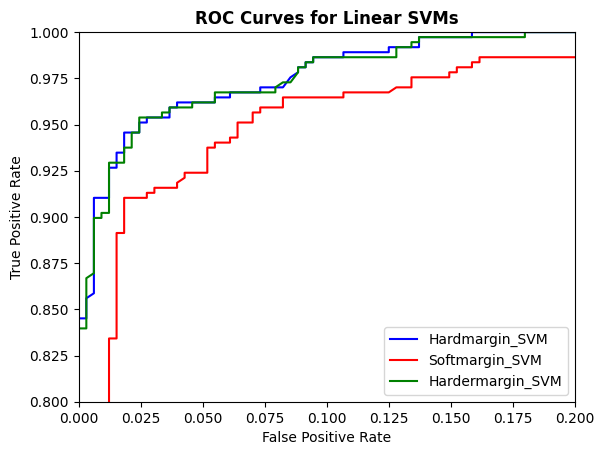

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_hard, tpr_hard, label = 'Hardmargin_SVM', color = 'b')
plt.plot(fpr_soft, tpr_soft, label = 'Softmargin_SVM', color = 'r')
plt.plot(fpr_harder, tpr_harder, label = 'Hardermargin_SVM', color = 'g')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.xlim(0,0.2)
plt.ylim(0.8,1)
plt.title('ROC Curves for Linear SVMs', fontweight="bold")
plt.show()

* (b) Use cross-validation to choose γ (use average validation accuracy to compare): Using a 5-fold cross-validation, find the best value of the parameter γ in the range $\{10^k| − 3 ≤ k ≤ 6, k ∈ Z\}$. Again, plot the ROC curve and report the confusion matrix and calculate the accuracy, recall precision and F-1 score of this best SVM.

  **Answers: Best hyperparameter γ of the Linear SVMs: 10 (due to the performance problem of the laptop, we can only search the haperparameter from certain numbers such as 0.01, 1, 100,1000,10000)**

```plain text
best hyperparameter:10
Best Linear SVMs:
confusion_matrix:
[[310  18]
 [ 14 354]]
accuracy:0.9540229885057471
recall:0.9619565217391305
precision:0.9516129032258065
f1_score:0.9567567567567569
```

best hyperparameter:10
Best Linear SVMs:
confusion_matrix:
[[310  18]
 [ 14 354]]
accuracy:0.9540229885057471
recall:0.9619565217391305
precision:0.9516129032258065
f1_score:0.9567567567567569


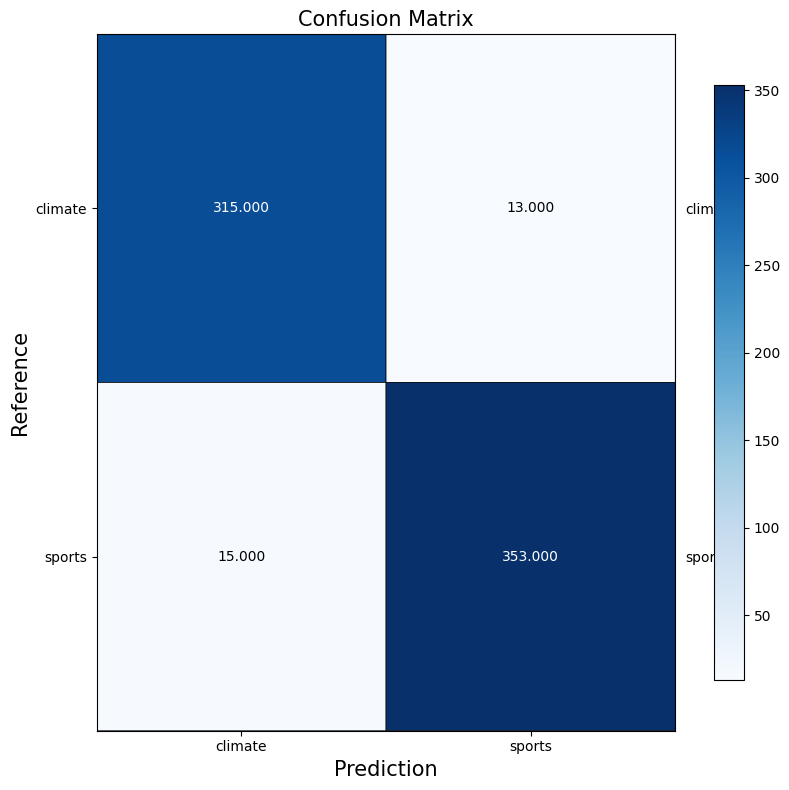

In [ ]:
# Cross Validation
from sklearn.model_selection import GridSearchCV
#from sklearn.svm import SVC
C_list = [10**(i-3) for i in range(10)]
svm_cv = GridSearchCV(estimator=SVC(kernel='linear', probability=True, random_state=42),
                      param_grid={'C':C_list}, cv=5)
#(*due to the performance problem of the laptop, we can only search the haperparameter from certain numbers such as 0.01, 1, 100,1000,1000)
'''
svm_cv = GridSearchCV(estimator=SVC(kernel='linear', probability=True, random_state=42),
                      param_grid={'C':10**np.arange(-3, 6,dtype=float)}, cv=5)
'''
svm_cv.fit(X_train_LSI, Y_train_binary)

import pandas as pd

pd.DataFrame(svm_cv.cv_results_)[['param_C','mean_test_score']]
svm_best = SVC(C=svm_cv.best_params_['C'], kernel='linear', random_state=42)
print(f"best hyperparameter:{svm_cv.best_params_['C']}")
svm_best.fit(X_train_LSI, Y_train_binary)

Y_test_label_best = svm_best.predict(X_test_LSI)
Y_test_prob_best = svm_best.decision_function(X_test_LSI)

calculate_metrics(Y_test_binary, Y_test_label_best, label_list, "Best Linear SVMs")


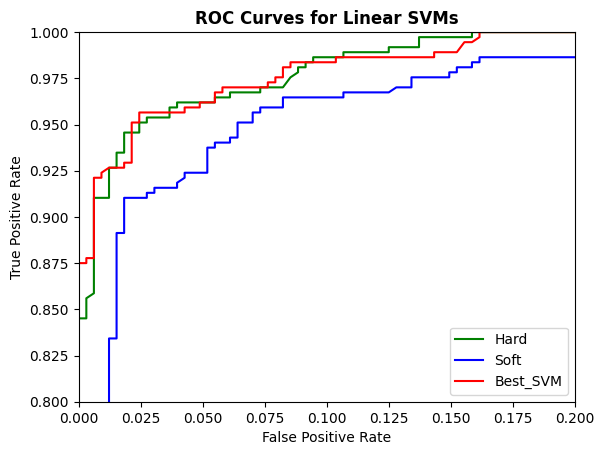

In [ ]:
fpr_best, tpr_best, _ = roc_curve(Y_test_binary, Y_test_prob_best)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_hard, tpr_hard, label = 'Hard', color = 'g')
plt.plot(fpr_soft, tpr_soft, label = 'Soft', color = 'b')
plt.plot(fpr_best, tpr_best, label = 'Best_SVM', color = 'r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.xlim(0,0.2)
plt.ylim(0.8,1)
plt.title('ROC Curves for Linear SVMs', fontweight="bold")
plt.show()

## QUESTION 6: Evaluate a logistic classifier:
### (a) Train a logistic classifier without regularization (you may need to come up with some way to approximate this if you use sklearn.linear model.LogisticRegression); plot the ROC curve and report the confusion matrix and calculate the accuracy, recall precision and F-1 score of this classifier on the testing set.

  **Answer:**
```
Logistic Regression without regularization:
confusion_matrix:
[[315  13]
 [ 15 353]]
accuracy:0.9597701149425287
recall:0.9592391304347826
precision:0.9644808743169399
f1_score:0.9618528610354223
```

  


Logistic Regression without regularization:
confusion_matrix:
[[315  13]
 [ 15 353]]
accuracy:0.9597701149425287
recall:0.9592391304347826
precision:0.9644808743169399
f1_score:0.9618528610354223


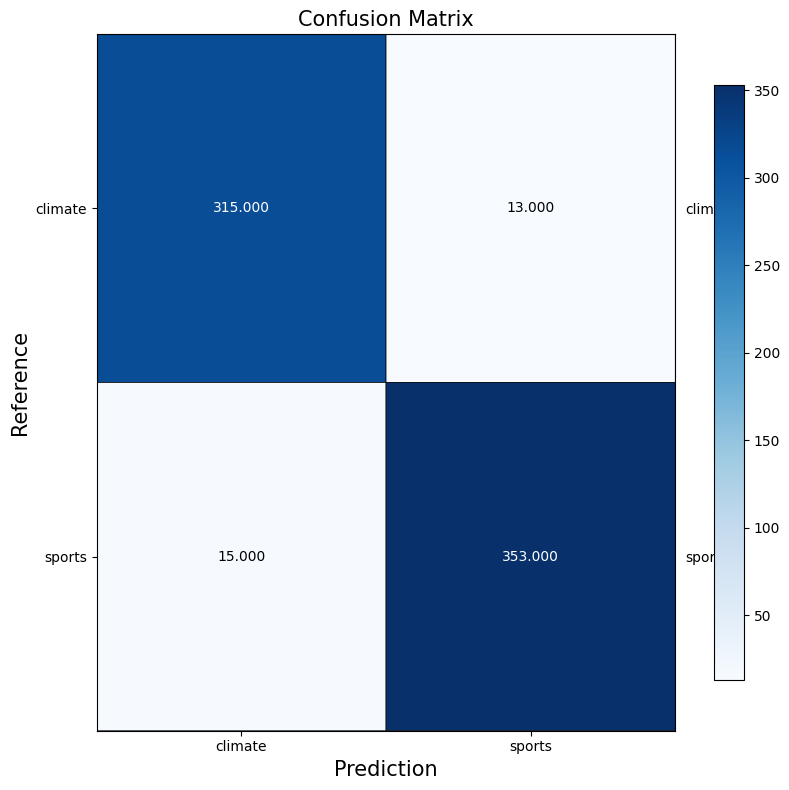

In [ ]:
from sklearn.linear_model import LogisticRegression

# without regularization
logistic_raw = LogisticRegression(penalty=None, solver='lbfgs', random_state=42, max_iter=1000)
logistic_raw.fit(X_train_LSI, Y_train_binary)

Y_test_label_raw = logistic_raw.predict(X_test_LSI)
Y_test_prob_raw = logistic_raw.decision_function(X_test_LSI)

'''
###############!!!###########
from sklearn.model_selection import cross_val_score
# Perform cross-validation
cv_scores = cross_val_score(logistic_raw, X_train_LSI, Y_train_binary, cv=5, scoring='accuracy')  # Adjust cv and scoring as needed

# Calculate the mean test score
mean_test_score = cv_scores.mean()

print("Mean Test Score:", mean_test_score)
Mean Test Score: 0.9625899280575538
###############!!!###########
'''
calculate_metrics(Y_test_binary, Y_test_label_raw, label_list, "Logistic Regression without regularization")


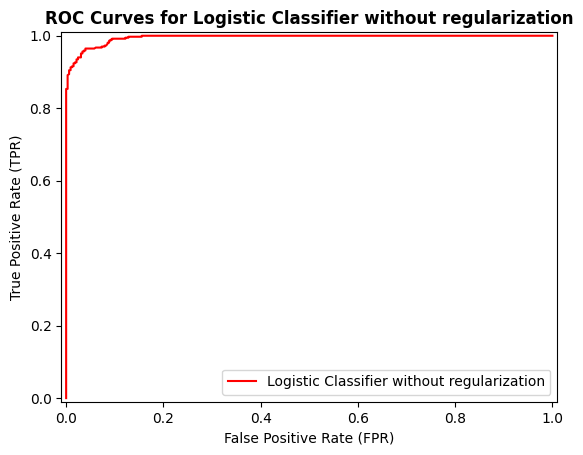

In [ ]:
fpr_best, tpr_best, _ = roc_curve(Y_test_binary, Y_test_prob_raw)

#plt.plot([0, 1], [0, 1], 'k--')
#plt.plot(fpr_hard, tpr_hard, label = 'Hard', color = 'b')
#plt.plot(fpr_soft, tpr_soft, label = 'Soft', color = 'r')
plt.plot(fpr_best, tpr_best, label = 'Logistic Classifier without regularization', color = 'r')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.xlim(-0.01,1.01)
plt.ylim(-0.01,1.01)
plt.title('ROC Curves for Logistic Classifier without regularization', fontweight="bold")
plt.show()

### (b) Find the optimal regularization coefficient:
- Using 5-fold cross-validation on the dimension-reduced-by-SVD training data, find the optimal regularization strength in the range $\{10k|−5 ≤ k ≤ 5, k ∈ Z\}$ for logistic regression with L1 regularization and logistic regression with L2 regularization, respectively.

  **Answer:** \
  **optimal L1 regularization strength:10;** \
  **optimal L2 regularization strength:10**

- Compare the performance (accuracy, precision, recall and F-1 score) of 3 logistic classifiers: w/o regularization, w/ L1 regularization and w/ L2 regularization (with the best parameters you found from the part above), using test data.


```
Answer w/o regularization:
confusion_matrix:
 [[349   7]
 [ 15 325]]
accuracy: 0.9683908045977011
recall: 0.9558823529411765
precision: 0.9789156626506024
f1_score: 0.9672619047619049

L1 regularization:
confusion_matrix:
 [[349   7]
 [ 15 325]]
accuracy: 0.9683908045977011
recall: 0.9558823529411765
precision: 0.9789156626506024
f1_score: 0.9672619047619049

L2 regularization:
confusion_matrix:
 [[348   8]
 [ 14 326]]
accuracy: 0.9683908045977011
recall: 0.9588235294117647
precision: 0.9760479041916168
f1_score: 0.967359050445104
```


- How does the regularization parameter affect the test error? How are the learnt coefficients affected? Why might one be interested in each type of regularization?

  **Answer:**
  **A small regularization parameter (C) strengthens regularization, penalizing large coefficients to prevent overfitting. This may lead to an underfit model on the training set but often improves generalization to new data, reducing test error. Conversely, a large C weakens regularization, fitting the training data closely, potentially resulting in overfitting and higher test error due to reduced generalization.**

  **Regularization influences learned coefficients, with strong regularization shrinking them towards zero.**

  **From the result it looks like both L1 and L2 regularization parameters have no obvious impact on the test error. The coefficient of L1 regularization has more zero because in the optimization fuction zero paramenters can usually contribute to a smaller L1 loss fuction.The coefficient of L2 logistic model tends to distribute weights evenly, reducing the weights of certain features, rather than shrinking them to zero. This is because L2 loss function needs to consider more about the larger loss term to optimize the loss function. L1 norm encourages sparsity, aiding in feature selection and robustness to outliers. L2 norm, being smooth, is computationally efficient but may not yield sparse solutions and is sensitive to outliers. The choice depends on the trade-off between sparsity and smoothness.**




```plaintext
Logistic Classifier L1 regularization:
confusion_matrix:
[[315  13]
 [ 15 353]]
accuracy:0.9597701149425287
recall:0.9592391304347826
precision:0.9644808743169399
f1_score:0.9618528610354223



L1 coefficient:[[-14.6435171  -38.383427    42.15049696 -13.31331641   0.
    3.10065608 -21.70797464   4.40885253   0.           5.85393558
   28.52169166   1.24526185 -13.24313763  10.36081423 -10.34211538
    0.          -5.90395818   2.17818122   9.41696511  -9.97977419
    1.33525428   1.18924755   0.19249571 -26.33070768  -8.19566352
   -9.12379958   0.          12.18623796   3.60421631  -4.76429066
    0.          -3.73921445   4.44904508  -7.03262228   1.11848396
    5.79016692   0.          -2.90141869  -0.10487203  14.56133595
    8.92624177  12.46963616   7.43189611 -10.14612526  -4.27679785
    3.43242474  -6.5470411    1.07260778 -13.23343521  -2.60885369]]
```


```plaintext
Logistic Classifier without L2 regularization:
confusion_matrix:
[[309  19]
 [ 16 352]]
accuracy:0.9497126436781609
recall:0.9565217391304348
precision:0.9487870619946092
f1_score:0.952638700947226


L2 coefficient:[[ -7.08621098 -14.91078242  26.36428437  -8.30458981  -1.79223415
    1.84945867  10.30840222  -2.35713254   0.2909192    8.7530109
   -6.63348737   0.16752539  -5.20255984   1.48023387   3.01530113
    5.41946184  -1.40624785  -1.4612789   -3.61989211  -1.10931001
   -6.26560095   3.9274135   -2.66914393   1.29808773   1.0103509
    3.54085913   4.83958229  -6.26481841   1.33550421  -0.51266817
    3.10024048   0.84707634  -0.35166461   4.63692435  -5.10194845
   -0.09599905   1.40250573  -0.72642365  -3.8847807   -2.42580455
   -1.72141521   6.2652301   -1.27340587   0.55288525   5.0551053
    1.4378525    3.38539293   4.24452232   2.32554398  -0.98315969]]
```
- Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary. What is the difference between their ways to find this boundary? Why do their performances differ? Is this difference statistically significant?

    **Answer:Logistic Regression minimizes logistic loss, estimating class probabilities. Linear SVM finds a hyperplane to maximize margin between classes, using hinge loss. Logistic Regression is sensitive to outliers, while SVM is less so. This difference is not statistically significant.**

In [ ]:
# best logistic regression with l1 penalty
C_list = [10**(i-5) for i in range(11)]
logistic_l1_cv = GridSearchCV(estimator=LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter=1000),
                              param_grid={'C':C_list}, cv=5)
#(*due to the performance problem of the laptop, we can only search the haperparameter from certain numbers such as 0.01, 1, 100,1000,1000)
logistic_l1_cv.fit(X_train_LSI, Y_train_binary)

print(f"best hyperparameter:{logistic_l1_cv.best_params_['C']}")

best hyperparameter:100


Logistic Classifier L1 regularization:
confusion_matrix:
[[315  13]
 [ 15 353]]
accuracy:0.9597701149425287
recall:0.9592391304347826
precision:0.9644808743169399
f1_score:0.9618528610354223


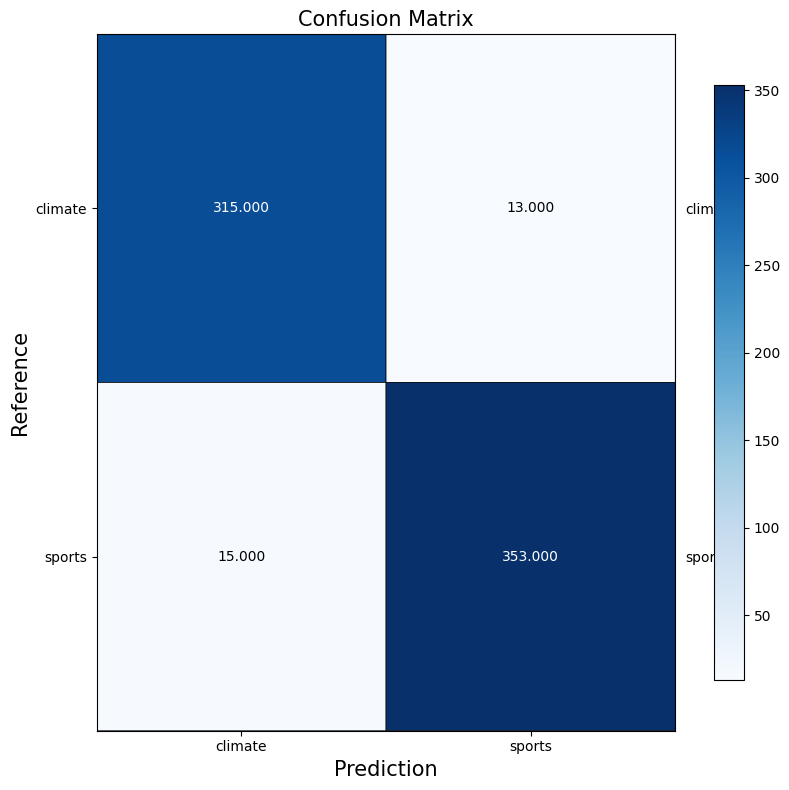



L1 coefficient:[[-25.1473676  -35.70220233  57.64798714 -21.7088525   -2.23419146
    8.52125027  42.91264685  -1.86780279  -9.06162252   4.7971578
  -19.7211296    4.70919154  -7.53441855   4.37567255   6.92518503
   12.69259799  -9.0819754   -9.08182164  -8.66146261   0.
  -14.896035     6.39181074  -8.40821114   1.06168214  -0.573047
   10.71282753   6.37738948 -24.05953116   9.92763798  -0.31308978
   10.91950324   7.29101581 -13.64717053  16.19413749 -15.30687427
    0.57354289   0.          -0.40246544 -10.3332836   -5.6299045
   -0.89055775  23.99428177  -7.84033959   1.98234914  16.26364013
    1.57474507  17.06183322  10.36710549   9.06107765   7.35380175]]


In [ ]:
logistic_l1_best = LogisticRegression(penalty='l1', C=logistic_l1_cv.best_params_['C'],
                                      solver='liblinear', random_state=42, max_iter=1000)
logistic_l1_best.fit(X_train_LSI, Y_train_binary)

Y_test_label_logisticl1 = logistic_l1_best.predict(X_test_LSI)
Y_test_prob_logisticl1 = logistic_l1_best.decision_function(X_test_LSI)

calculate_metrics(Y_test_binary, Y_test_label_logisticl1, label_list, "Logistic Classifier L1 regularization")

print(f'L1 coefficient:{logistic_l1_best.coef_}')

In [ ]:
# best logistic regression with l1 penalty
logistic_l2_cv = GridSearchCV(estimator=LogisticRegression(penalty='l2', solver='liblinear', random_state=42),
                              param_grid={'C':C_list}, cv=5)
#(*due to the performance problem of the laptop, we can only search the haperparameter from certain numbers such as 0.01, 1, 100,1000,1000)
logistic_l2_cv.fit(X_train_LSI, Y_train_binary)
print(f"best hyperparameter:{logistic_l1_cv.best_params_['C']}")

best hyperparameter:100


Logistic Classifier with L2 regularization:
confusion_matrix:
[[309  19]
 [ 16 352]]
accuracy:0.9497126436781609
recall:0.9565217391304348
precision:0.9487870619946092
f1_score:0.952638700947226


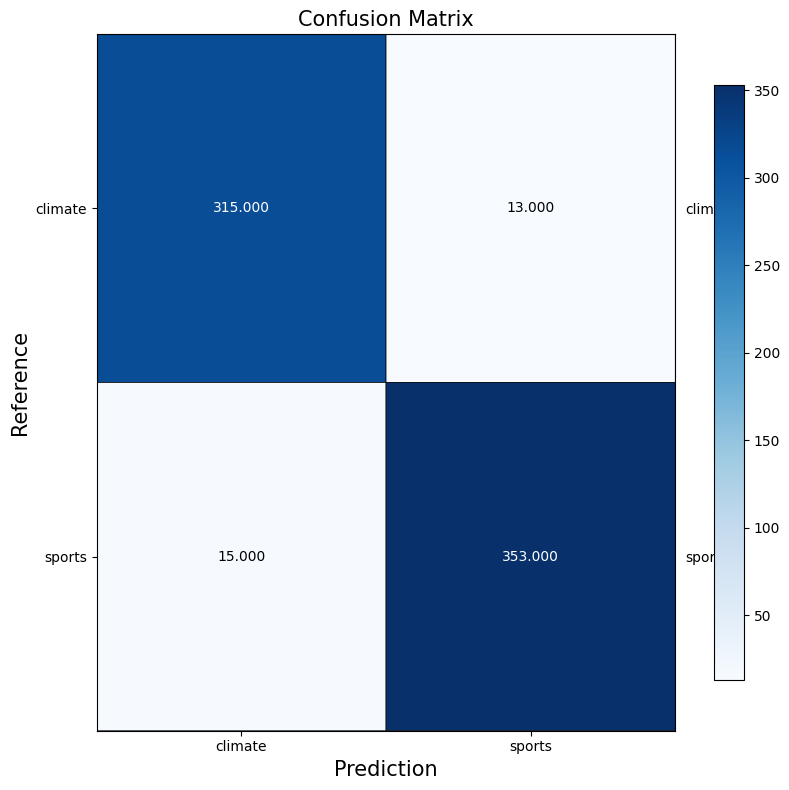



L2 coefficient:[[ -7.08621098 -14.91078242  26.36428437  -8.30458981  -1.79223415
    1.84945867  10.30840222  -2.35713254   0.2909192    8.75301091
   -6.63348737   0.16752538  -5.20255984   1.48023387   3.01530113
    5.41946184  -1.40624785  -1.4612789   -3.61989211  -1.10931001
   -6.26560095   3.9274135   -2.66914393   1.29808773   1.0103509
    3.54085913   4.83958229  -6.26481841   1.3355042   -0.51266817
    3.10024048   0.84707634  -0.35166461   4.63692435  -5.10194845
   -0.09599905   1.40250573  -0.72642365  -3.8847807   -2.42580455
   -1.72141521   6.2652301   -1.27340587   0.55288525   5.0551053
    1.4378525    3.38539293   4.24452232   2.32554398  -0.98315969]]


In [ ]:
logistic_l2_best = LogisticRegression(penalty='l2', C=logistic_l2_cv.best_params_['C'],
                                      solver='liblinear', random_state=42)
logistic_l2_best.fit(X_train_LSI, Y_train_binary)

Y_test_label_logisticl2 = logistic_l2_best.predict(X_test_LSI)
Y_test_prob_logisticl2 = logistic_l2_best.decision_function(X_test_LSI)


calculate_metrics(Y_test_binary, Y_test_label_logisticl2, label_list, "Logistic Classifier with L2 regularization")

print(f'L2 coefficient:{logistic_l2_best.coef_}')

## QUESTION 7: Evaluate and profile a Naıve Bayes classifier: Train a GaussianNB classifier; plot the ROC curve and report the confusion matrix and calculate the accuracy, recall, precision and F-1 score of this classifier on the testing set.

**Answer:**
```plaintext
GaussianNB classifier:
confusion_matrix:
[[286  42]
 [ 13 355]]
accuracy:0.9209770114942529
recall:0.9646739130434783
precision:0.8942065491183879
f1_score:0.9281045751633987
```

GaussianNB classifier:
confusion_matrix:
[[286  42]
 [ 13 355]]
accuracy:0.9209770114942529
recall:0.9646739130434783
precision:0.8942065491183879
f1_score:0.9281045751633987


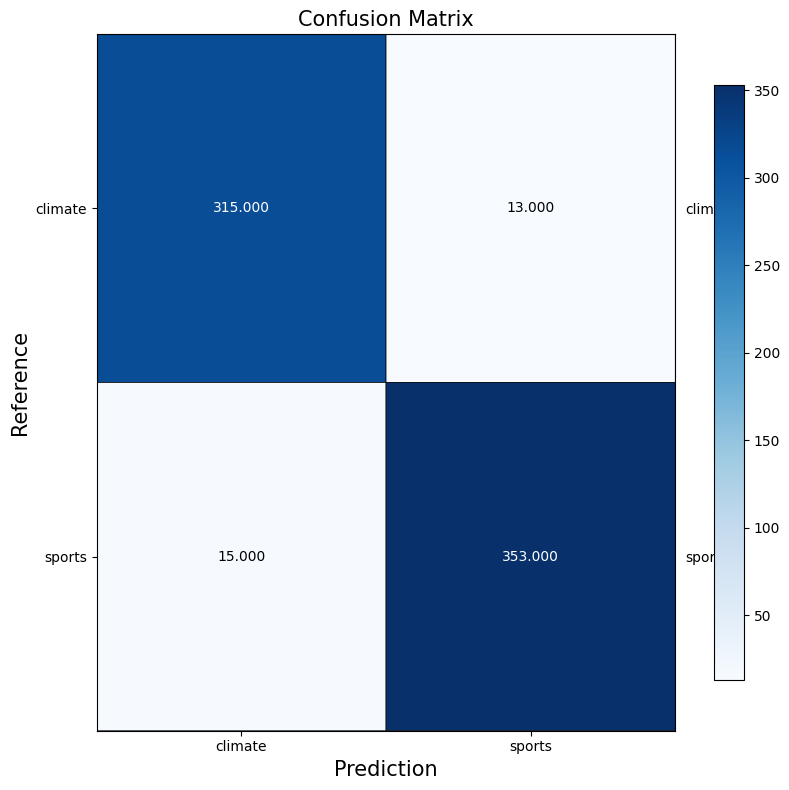

In [ ]:
from sklearn.naive_bayes import GaussianNB

gauss_nb = GaussianNB()
gauss_nb.fit(X_train_LSI, Y_train_binary)

Y_test_label_nb = gauss_nb.predict(X_test_LSI)
Y_test_prob_nb = gauss_nb.predict_proba(X_test_LSI)[:,1]

calculate_metrics(Y_test_binary, Y_test_label_nb, label_list, "GaussianNB classifier")

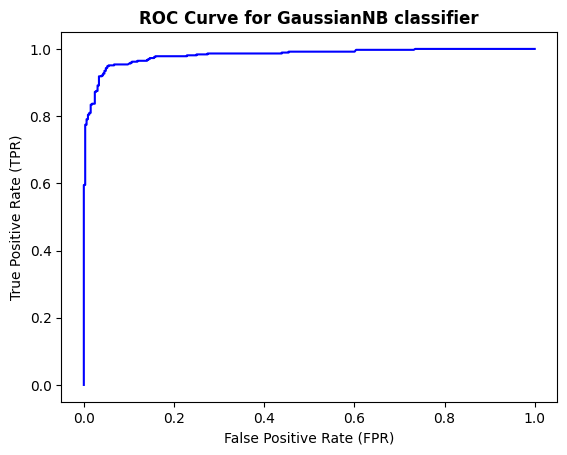

In [ ]:
fpr_nb, tpr_nb, _ = roc_curve(Y_test_binary, Y_test_prob_nb)
plt.plot(fpr_nb, tpr_nb, label = 'Naive Bayes', color = 'b')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for GaussianNB classifier', fontweight='bold')
plt.show()
# plt.savefig('ROC_NB.png')

# Grid Search of Parameters

## question 8
### In this part, you will attempt to find the best model for binary classification.

 • Construct a Pipeline that performs feature extraction, dimensionality reduction and classification;

 • The evaluation of each combination is performed with 5-fold cross-validation (use the average validation set accuracy across folds).

 • In addition to any other hyperparameters you choose, your gridsearch must at least include:

|  Module   |  Options  |
|  :----------:  | :----------:  |
| Loading Data  |  Clean the data |
| Feature Extraction  | min_df = 3 vs 5 while constructing the vocabulary; AND use Lemmatization vs Stemming as a compression module |
| Dimensionality Reduction  | LSI (k = [5,30,80]) vs NMF (k = [5,30,80]) |
| Classifier  | <div style="width: 1000px">SVM with the best γ previously found vs Logistic Regression: L1 regularization vs L2 regularization, with the best regularization strength previously found vs GaussianNB Note: You can once again find the optimal hyperparameters for each classifier, but this is not required.</div> |
|  Other options  | Use default |

 • What are the 5 best combinations? Report their performances on the testing set.


In [ ]:
X_train_LSI.shape

(2780, 50)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

#step 1 clean the dataset
'''
train_raw['full_text']=train_raw['full_text'].apply(clean)
test_raw['full_text']=test_raw['full_text'].apply(clean)
'''
#step 2 lemmatization VS stemming
'''
train_raw['full_text']=lemmatize_sent(train_raw['full_text'])
test_raw['full_text']=lemmatize_sent(test_raw['full_text'])
train_raw['full_text']=lemmatize(train_raw['full_text'])
test_raw['full_text']=lemmatize(test_raw['full_text'])
'''
'''
X_train_LSI = lsi.fit_transform(train_matrix)
train_matrix=tfidf_vectorizer.fit_transform(train['cleaned_full_text'])
'''


# define a Pipeline
text_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')), #step3
    ('reduce_dim', TruncatedSVD()),#step4
    ('clf', SVC()),#step5
])

parameters = [
    {
        'tfidf__min_df': [3, 5, 10],
        'reduce_dim': [
            TruncatedSVD(n_components=5, random_state=42),
            TruncatedSVD(n_components=30, random_state=42),
            TruncatedSVD(n_components=80, random_state=42),
            NMF(n_components=5, random_state=42),
            NMF(n_components=30, random_state=42),
            NMF(n_components=80, random_state=42)
        ],
        'clf': [SVC(C=svm_cv.best_params_['C'], kernel='linear'), GaussianNB(),
               LogisticRegression(C=logistic_l1_best.C, penalty = 'l1', solver='liblinear', random_state=42),
               LogisticRegression(C=logistic_l2_best.C, penalty = 'l2', solver='liblinear', random_state=42)]
    }
]

# Gridsearch
######!!!!!######

# Create the GridSearchCV object
grid_search = GridSearchCV(text_pipeline, parameters, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV on your data
#@grid_search.fit(train_raw['full_text'], Y_train_binary)
grid_search.fit(train['cleaned_full_text'], Y_train_binary)###

# Get the top five sets of optimal parameters
results_df = pd.DataFrame(grid_search.cv_results_)
top_five_params = results_df[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False).head(5)

# Display the top five sets of optimal parameters
print(top_five_params)

######!!!!!######

'''
###This is the original method which can run successfully
# Fit the pipeline on the training data
text_pipeline.fit(train_raw['full_text'], Y_train_binary)

#predict
predicted_labels = text_pipeline.predict(test_raw['full_text'])
print(predicted_labels.shape)
'''

                                               params  mean_test_score
62  {'clf': LogisticRegression(C=10, random_state=...         0.960072
8   {'clf': SVC(C=10, kernel='linear'), 'reduce_di...         0.959353
51  {'clf': LogisticRegression(C=100, penalty='l1'...         0.958993
42  {'clf': LogisticRegression(C=100, penalty='l1'...         0.958633
44  {'clf': LogisticRegression(C=100, penalty='l1'...         0.958633


"\n###This is the original method which can run successfully\n# Fit the pipeline on the training data\ntext_pipeline.fit(train_raw['full_text'], Y_train_binary)\n\n#predict\npredicted_labels = text_pipeline.predict(test_raw['full_text'])\nprint(predicted_labels.shape)\n"

In [ ]:
pd.set_option('display.max_colwidth', None)
results_df[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False).head()

,params,mean_test_score
62,"{'clf': LogisticRegression(C=10, random_state=42, solver='liblinear'), 'reduce_dim': TruncatedSVD(n_components=80, random_state=42), 'tfidf__min_df': 10}",0.960072
8,"{'clf': SVC(C=10, kernel='linear'), 'reduce_dim': TruncatedSVD(n_components=80, random_state=42), 'tfidf__min_df': 10}",0.959353
51,"{'clf': LogisticRegression(C=100, penalty='l1', random_state=42, solver='liblinear'), 'reduce_dim': NMF(n_components=80, random_state=42), 'tfidf__min_df': 3}",0.958993
42,"{'clf': LogisticRegression(C=100, penalty='l1', random_state=42, solver='liblinear'), 'reduce_dim': TruncatedSVD(n_components=80, random_state=42), 'tfidf__min_df': 3}",0.958633
44,"{'clf': LogisticRegression(C=100, penalty='l1', random_state=42, solver='liblinear'), 'reduce_dim': TruncatedSVD(n_components=80, random_state=42), 'tfidf__min_df': 10}",0.958633


# Multiclass Classification

## Question 9: In this part, we aim to learn classifiers on the documents belonging to unique classes in the column leaf label.Perform Naıve Bayes classification and multiclass SVM classification (with both One VS One and One VS the rest methods described above) and report the confusion matrix and calculate the accuracy, recall, precision and F-1 score of your classifiers. How did you resolve the class imbalance issue in the One VS the rest model?

**Answer: we made the weight parameter equal to 'balance' in the onevstest model to solve the imbalanced issue.**


### In addition, answer the following questions:

• In the confusion matrix you should have an 10 × 10 matrix where 10 is the number of unique
labels in the column leaf label. Please make sure that the order of these labels is as
follows:
map_row_to_class = {0:"basketball", 1:"baseball", 2:"tennis", 3:"football", 4:"soccer", 5:"forest fire", 6:"flood", 7:"earthquake",8:"drought", 9:"heatwave"}
Do you observe any structure in the confusion matrix? Are there distinct visible blocks on the
major diagonal? What does this mean?

**Answer:The structure is that the diagonal entries are much larger than the other entries in the confusion matrix. The diagonal entries are located where the true class and predicted class are the same. In a confusion matrix, the diagonal entries represent the number of correctly classified instances for each class. Each row corresponds to the true class, and each column corresponds to the predicted class.**

• Based on your observation from the previous part, suggest a subset of labels that should be merged into a new larger label and recompute the accuracy and plot the confusion matrix. How did the accuracy change in One VS One and One VS the rest?

**Answer:We merged the class 'forest fire' and 'heatwave'. In the One VS One classifier, the accuarcy improved from 0.763 to 0.851, in the One VS the rest classifier, the accuracy improved from 0.776 to 0.889.**


• Does class imbalance impact the performance of the classification once some classes are merged? Provide a resolution for the class imbalance and recompute the accuracy and plot the confusion matrix in One VS One and One VS the rest?

**Answer:Class imbalance can influence how well a classification model works, particularly when some classes have much more or fewer examples compared to others. This can result in the model being better at predicting the more common classes but struggling with the less common ones.**

**To tackle this issue, we used a technique called under-sampling, which involves reducing the number of examples in the majority class. After applying this technique:**

**In the One VS One classifier, the accuracy improved from 0.851 to 0.869.**

**In the One VS the Rest classifier, the accuracy improved from 0.889 to 0.892.**

**This suggests that under-sampling helped enhance the performance of the model, especially in the One VS One scenario.**



In [ ]:
'''
from sklearn.model_selection import train_test_split
train_raw, test_raw = train_test_split(dataframe[['full_text','leaf_label']],test_size=0.2)
train, test = train_test_split(dataframe[['full_text','leaf_label']],test_size=0.2)
print(f"train:{train.shape},test:{test.shape}")
'''
#train['cleaned_fulltest'] and test['clean_fulltest'] can also be used, but we need to change the y labels to qualify the multiclass classification

#train_multiclass, test_multiclass = train_test_split(dataframe[['full_text','leaf_label']],test_size=0.2)


In [ ]:
#get the train/test labels
label_list = ['basketball','baseball', 'tennis','football','soccer','forest fire','flood','earthquake','drought','heatwave']

Y_train_multiclasslabel = pd.DataFrame()
label_mapping = {'basketball': 0,'baseball': 1, 'tennis': 2,'football': 3,'soccer': 4,'forest fire': 5,'flood': 6,'earthquake': 7,'drought': 8,'heatwave': 9}
Y_train_multiclasslabel['leaf_label'] = train.leaf_label.map(label_mapping)
Y_train_multiclasslabel = Y_train_multiclasslabel.squeeze()


Y_test_multiclasslabel = pd.DataFrame()
label_mapping = {'basketball': 0,'baseball': 1, 'tennis': 2,'football': 3,'soccer': 4,'forest fire': 5,'flood': 6,'earthquake': 7,'drought': 8,'heatwave': 9}
Y_test_multiclasslabel['leaf_label'] = test.leaf_label.map(label_mapping)
Y_test_multiclasslabel = Y_test_multiclasslabel.squeeze()

def caculate_metrics_multiclass(Y_label, Y_predict, label_list, title):
  mat = confusion_matrix(Y_label, Y_predict)
  print(title+"\n")
  print('confusion_matrix:\n', confusion_matrix(Y_label, Y_predict))
  print('accuracy:', accuracy_score(Y_label, Y_predict))
  print('recall:', recall_score(Y_label, Y_predict, average='micro'))
  print('precision:', precision_score(Y_label, Y_predict, average='micro'))
  print('f1_score:', f1_score(Y_label, Y_predict, average='micro'))
  plot_mat(mat, xticklabels = label_list, yticklabels = label_list, size=(8, 8))
  print("\n")

In [ ]:
###Y_train_multiclasslabel and Y_test_multiclasslabel will be used in the following multiclass classification part

In [ ]:
#X_train_LSI.shape:(2780, 50)
#Y_train_multiclasslabel.shape:(2780, 1)

Naıve Bayes classifier:

confusion_matrix:
 [[75  3  7  5  0  0  0  0  0  0]
 [ 1 56  9  2  0  0  1  0  2  4]
 [ 0  7 55  0  3  0  2  0  0  2]
 [ 3  1  4 47  6  0  0  0  0  0]
 [ 0  1  6  1 65  0  0  0  0  0]
 [ 0  5  6  0  1 15  0  1 15 30]
 [ 0  1  1  0  0  1 60  0  2  1]
 [ 0  2  8  0  0  0  0 43  1  0]
 [ 0  2  2  0  0  0  0  0 63  1]
 [ 0  4  7  0  0 28  4  0  6 18]]
accuracy: 0.7140804597701149
recall: 0.7140804597701149
precision: 0.7140804597701149
f1_score: 0.7140804597701149


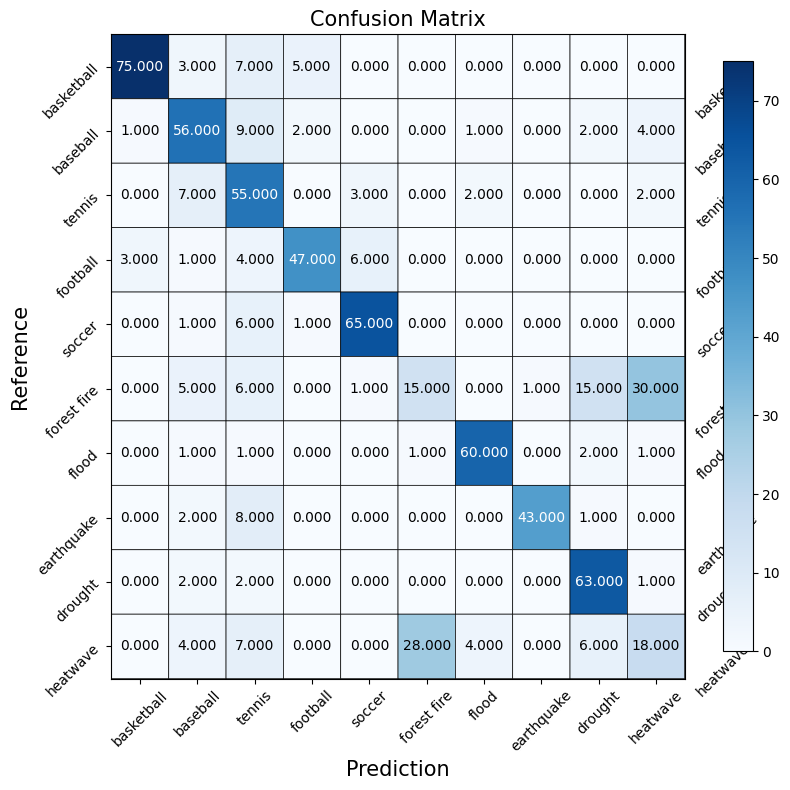

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

gauss_nb = GaussianNB()
gauss_nb.fit(X_train_LSI, Y_train_multiclasslabel)

Y_test_label_nb = gauss_nb.predict(X_test_LSI)

caculate_metrics_multiclass(Y_test_multiclasslabel, Y_test_label_nb, label_list, "Naıve Bayes classifier:")


One-Vs-One Linear SVM with TF-IDF w/o balanced:

confusion_matrix:
 [[80  3  6  0  0  0  0  0  0  1]
 [ 0 67  2  1  0  0  1  0  0  4]
 [ 0  6 59  0  1  0  1  0  0  2]
 [ 0  1  1 59  0  0  0  0  0  0]
 [ 0  4  5  2 62  0  0  0  0  0]
 [ 0  1  5  0  0 10  0  0  4 53]
 [ 0  2  0  0  0  0 60  0  0  4]
 [ 0  1  7  0  0  0  0 42  0  4]
 [ 0  2  2  0  0  0  0  0 58  6]
 [ 0  3  4  0  0 18  2  0  1 39]]
accuracy: 0.7701149425287356
recall: 0.7701149425287356
precision: 0.7701149425287356
f1_score: 0.7701149425287356


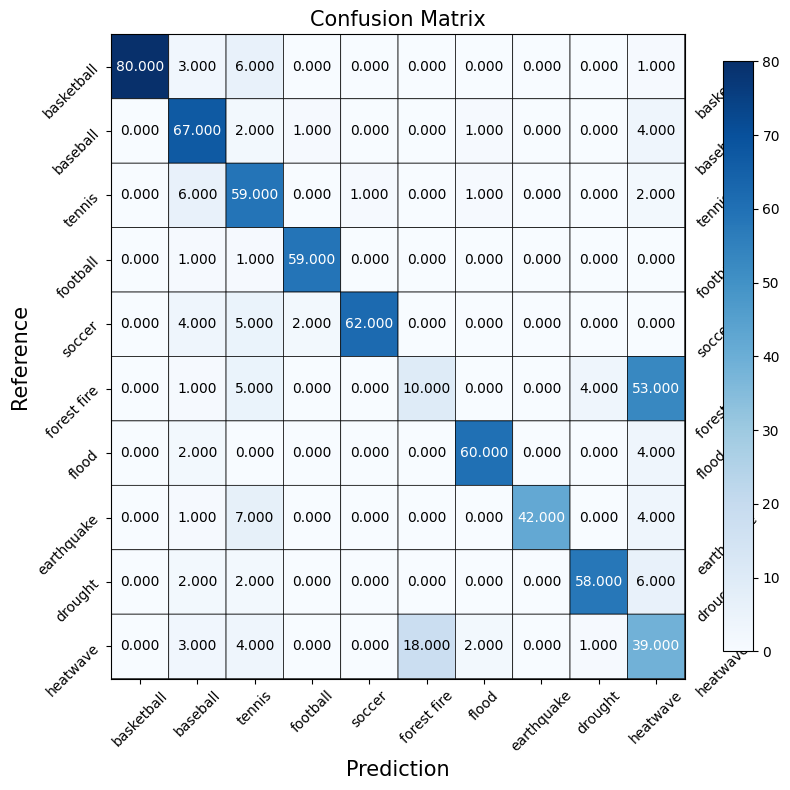

In [ ]:
# One-Vs-One Linear SVM with TF-IDF w/o balanced
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
mclass_svm_ovo = OneVsOneClassifier(SVC(kernel='linear', random_state=42))
mclass_svm_ovo.fit(X_train_LSI, Y_train_multiclasslabel)
Y_test_label_svm = mclass_svm_ovo.predict(X_test_LSI)

caculate_metrics_multiclass(Y_test_multiclasslabel, Y_test_label_svm, label_list, "One-Vs-One Linear SVM with TF-IDF w/o balanced:")


One-Vs-Rest Linear SVM with TF-IDF using class weights:

confusion_matrix:
 [[83  3  0  0  0  4  0  0  0  0]
 [ 0 71  0  0  0  1  0  0  1  2]
 [ 0 10 54  0  2  1  0  0  0  2]
 [ 0  0  0 60  1  0  0  0  0  0]
 [ 1  4  2  2 64  0  0  0  0  0]
 [ 0  2  3  0  0 22  0  0  4 42]
 [ 0  2  0  0  0  2 61  0  0  1]
 [ 0  3  1  0  0  1  0 45  0  4]
 [ 0  3  0  0  0  3  0  0 58  4]
 [ 0  4  3  0  0 34  1  0  1 24]]
accuracy: 0.7787356321839081
recall: 0.7787356321839081
precision: 0.7787356321839081
f1_score: 0.7787356321839082


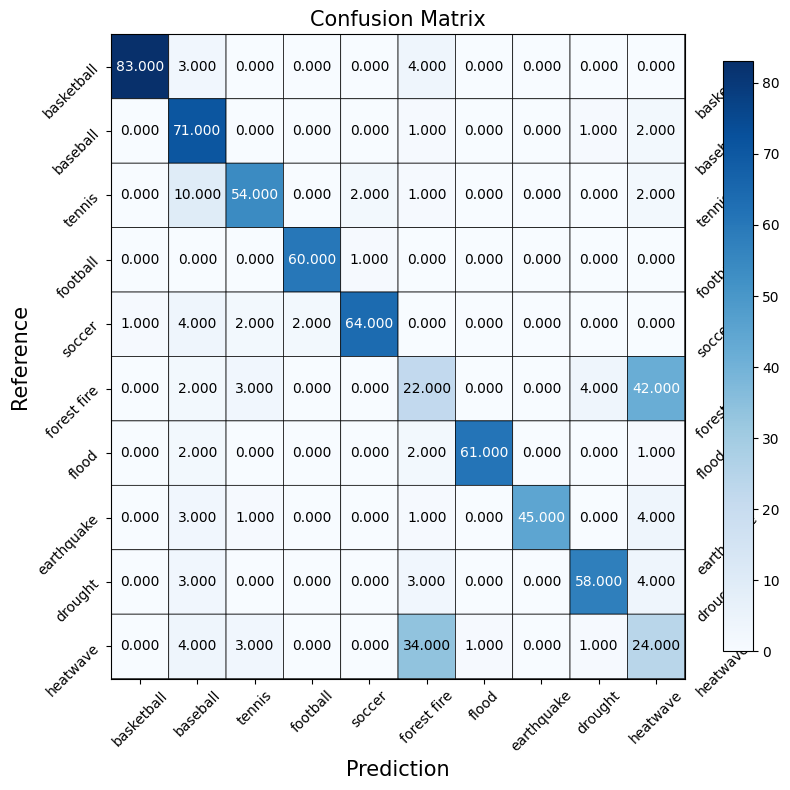

In [ ]:
#one vs all with weight
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
'''
# Define class_weight_dict with custom weights
class_counts=Y_train_multiclasslabel.value_counts()
class_weights = 1 / class_counts

#create a class weight dictionary
num_features = 9
class_weight_dict = {i: class_weights[i] for i in range(num_features)}
'''
# One-Vs-Rest Linear SVM with TF-IDF using class weights
mclass_svm_ovr = OneVsRestClassifier(SVC(kernel='linear', random_state=42, class_weight='balanced'))
mclass_svm_ovr.fit(X_train_LSI, Y_train_multiclasslabel)
Y_test_label_svm = mclass_svm_ovr.predict(X_test_LSI)


caculate_metrics_multiclass(Y_test_multiclasslabel, Y_test_label_svm, label_list, "One-Vs-Rest Linear SVM with TF-IDF using class weights:")


### Suggest a subset of labels that should be merged into a new larger label and recompute the accuracy and plot the confusion matrix

In [ ]:
label_list = ['basketball','baseball', 'tennis','football','soccer','forest fire and heatwave','flood','earthquake','drought']

#Merge the lable heatwave and forest fire
Y_train_multiclasslabel_merged = pd.DataFrame()
label_mapping = {'basketball': 0,'baseball': 1, 'tennis': 2,'football': 3,'soccer': 4,'forest fire': 5,'flood': 6,'earthquake': 7,'drought': 8,'heatwave': 5}
Y_train_multiclasslabel_merged['leaf_label'] = train.leaf_label.map(label_mapping)
Y_train_multiclasslabel_merged = Y_train_multiclasslabel_merged.squeeze()

Y_test_multiclasslabel_merged = pd.DataFrame()
label_mapping = {'basketball': 0,'baseball': 1, 'tennis': 2,'football': 3,'soccer': 4,'forest fire': 5,'flood': 6,'earthquake': 7,'drought': 8,'heatwave': 5}
Y_test_multiclasslabel_merged['leaf_label'] = test.leaf_label.map(label_mapping)
Y_test_multiclasslabel_merged = Y_test_multiclasslabel_merged.squeeze()
#Y_test_multiclasslabel_merged['leaf_label']

One-Vs-One Linear SVM with heatwave and forest fire merged:

confusion_matrix:
 [[ 79   2   0   0   0   9   0   0   0]
 [  0  55   0   1   0  19   0   0   0]
 [  0   5  48   0   1  14   1   0   0]
 [  0   1   1  58   0   1   0   0   0]
 [  0   1   2   2  62   6   0   0   0]
 [  0   0   1   0   0 133   1   0   5]
 [  0   0   0   0   0   8  58   0   0]
 [  0   0   0   0   0  12   0  42   0]
 [  0   0   0   0   0  11   0   0  57]]
accuracy: 0.8505747126436781
recall: 0.8505747126436781
precision: 0.8505747126436781
f1_score: 0.8505747126436781


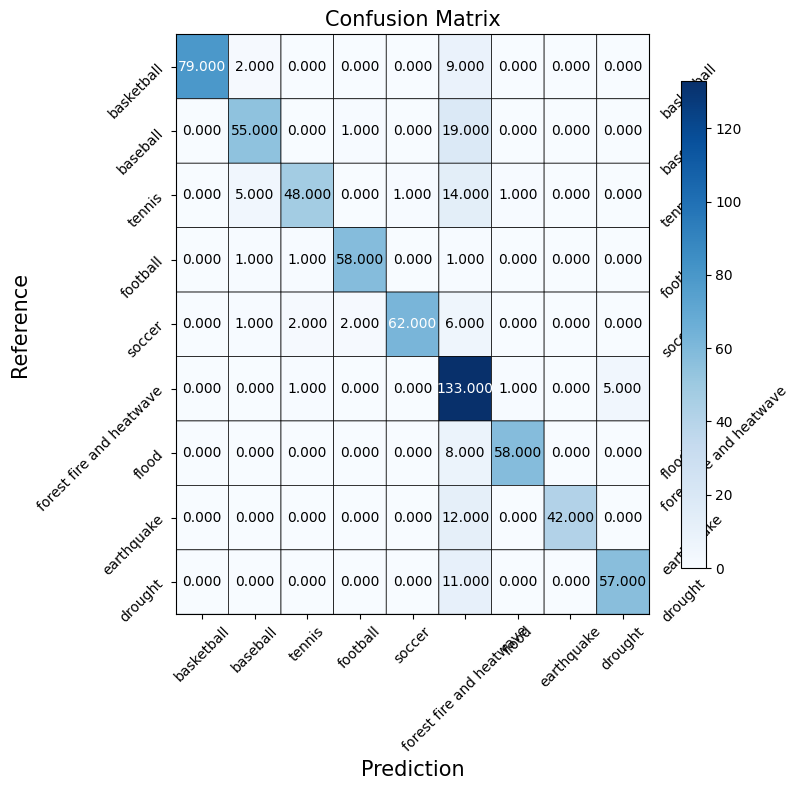

In [ ]:
mclass_svm_ovo = OneVsOneClassifier(SVC(kernel='linear', random_state=42))
mclass_svm_ovo.fit(X_train_LSI, Y_train_multiclasslabel_merged)
Y_test_label_svm = mclass_svm_ovo.predict(X_test_LSI)

caculate_metrics_multiclass(Y_test_multiclasslabel_merged, Y_test_label_svm, label_list, "One-Vs-One Linear SVM with heatwave and forest fire merged:")


One vs rest with heatwave and forest fire merged:

confusion_matrix:
 [[ 83   3   0   2   0   2   0   0   0]
 [  0  71   0   0   0   3   0   0   1]
 [  0  11  55   0   2   1   0   0   0]
 [  0   0   0  60   1   0   0   0   0]
 [  1   4   2   2  64   0   0   0   0]
 [  0   7   6   0   0 122   0   0   5]
 [  0   2   0   0   0   3  61   0   0]
 [  0   5   1   0   0   3   0  45   0]
 [  0   3   0   0   0   7   0   0  58]]
accuracy: 0.889367816091954
recall: 0.889367816091954
precision: 0.889367816091954
f1_score: 0.889367816091954


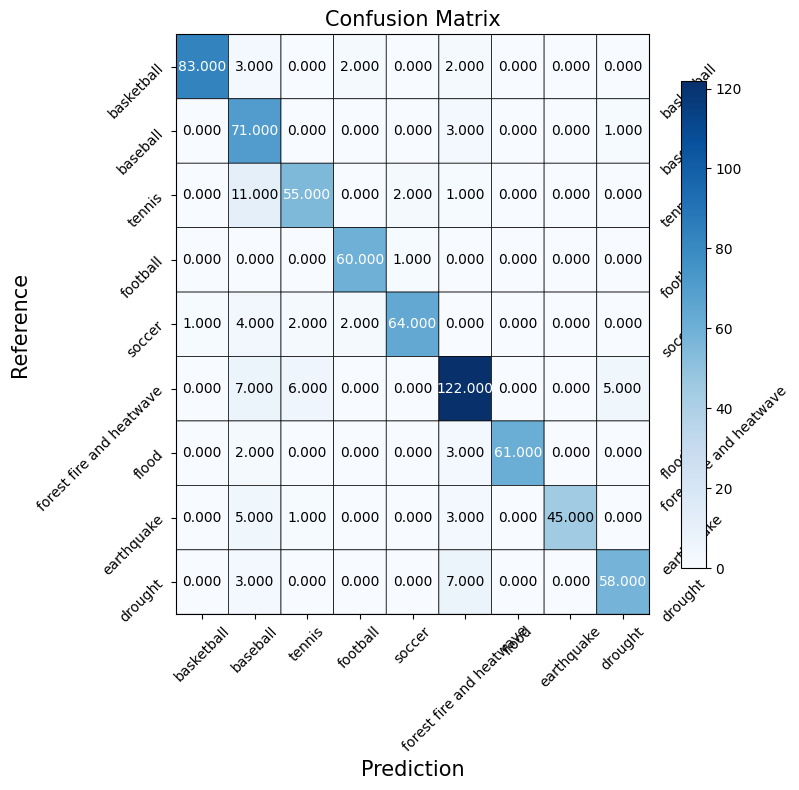

In [ ]:
#one vs all with weight
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# One-Vs-Rest Linear SVM with TF-IDF using class weights
mclass_svm_ovr = OneVsRestClassifier(SVC(kernel='linear', random_state=42, class_weight='balanced'))
mclass_svm_ovr.fit(X_train_LSI, Y_train_multiclasslabel_merged)
Y_test_label_svm = mclass_svm_ovr.predict(X_test_LSI)

caculate_metrics_multiclass(Y_test_multiclasslabel_merged, Y_test_label_svm, label_list, "One vs rest with heatwave and forest fire merged:")


One vs rest:

confusion_matrix:
 [[89  0  0  1  0  0  0  0  0  0]
 [ 0 63  1  2  1  0  5  0  3  0]
 [ 1  8 55  0  3  0  2  0  0  0]
 [ 1  0  0 60  0  0  0  0  0  0]
 [ 2  0  3  3 65  0  0  0  0  0]
 [ 0  3  3  0  3 24  2  3 10 25]
 [ 0  1  0  0  0  0 64  0  1  0]
 [ 2  0  1  2  0  0  0 49  0  0]
 [ 0  2  0  1  1  1  1  0 62  0]
 [ 0  7  3  1  3 34  5  1  4  9]]
accuracy: 0.7758620689655172
recall: 0.7758620689655172
precision: 0.7758620689655172
f1_score: 0.7758620689655173


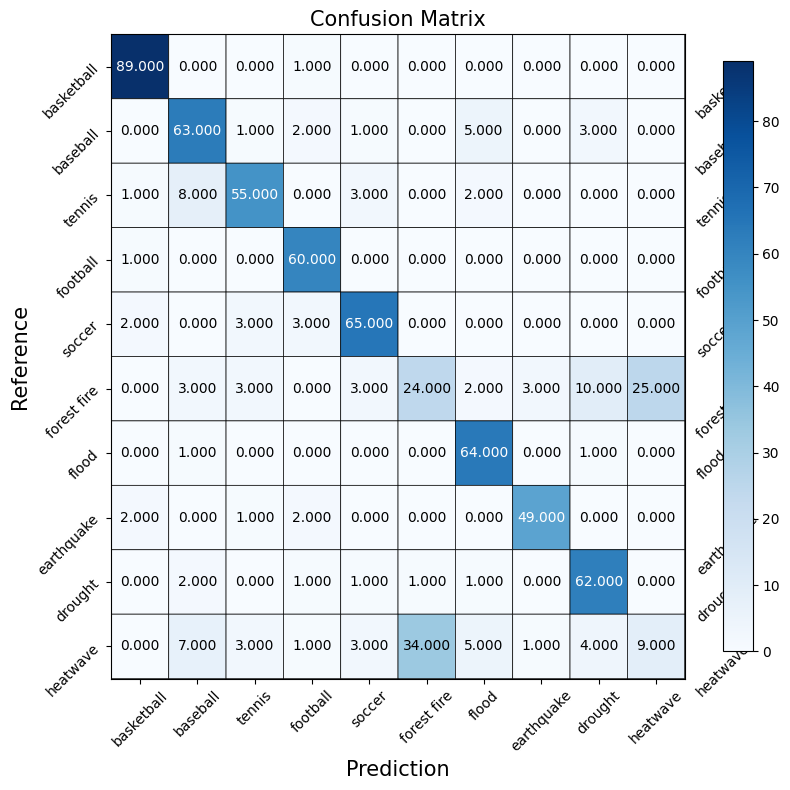

In [ ]:
#one vs all w/o  weight
label_list = ['basketball','baseball', 'tennis','football','soccer','forest fire','flood','earthquake','drought','heatwave']
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# One-Vs-Rest Linear SVM with TF-IDF using class weights
mclass_svm_ovr = OneVsRestClassifier(SVC(kernel='linear', random_state=42))
mclass_svm_ovr.fit(X_train_LSI, Y_train_multiclasslabel)
Y_test_label_svm = mclass_svm_ovr.predict(X_test_LSI)

caculate_metrics_multiclass(Y_test_multiclasslabel, Y_test_label_svm, label_list, "One vs rest:")


One-Vs-One Linear SVM with balanced:

confusion_matrix:
 [[80  3  6  0  0  0  0  0  0  1]
 [ 0 68  1  1  0  2  1  0  0  2]
 [ 0  7 58  0  1  0  1  0  0  2]
 [ 0  1  1 59  0  0  0  0  0  0]
 [ 0  5  4  2 62  0  0  0  0  0]
 [ 0  1  5  0  0 20  0  0  4 43]
 [ 0  2  0  0  0  2 59  0  0  3]
 [ 0  3  4  0  0  0  0 42  0  5]
 [ 0  2  2  0  0  0  0  0 58  6]
 [ 0  3  3  0  0 33  2  0  1 25]]
accuracy: 0.7629310344827587
recall: 0.7629310344827587
precision: 0.7629310344827587
f1_score: 0.7629310344827587


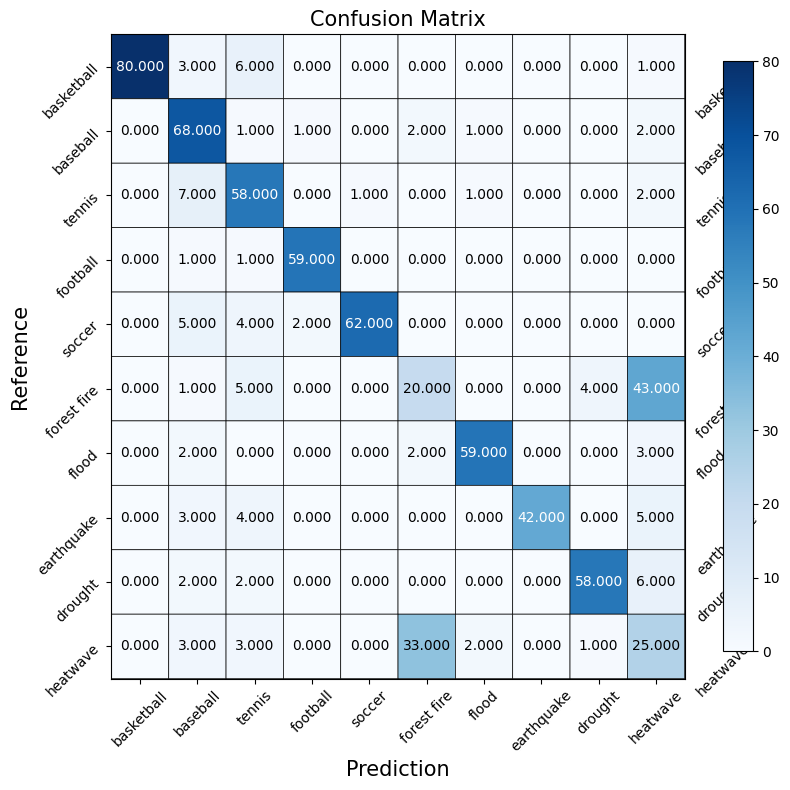

In [ ]:
# One-Vs-One Linear SVM with TF-IDF balanced
from sklearn.multiclass import OneVsOneClassifier

mclass_svm_ovo = OneVsOneClassifier(SVC(kernel='linear', random_state=42, class_weight='balanced'))
mclass_svm_ovo.fit(X_train_LSI, Y_train_multiclasslabel)
Y_test_label_svm = mclass_svm_ovo.predict(X_test_LSI)

caculate_metrics_multiclass(Y_test_multiclasslabel, Y_test_label_svm, label_list, "One-Vs-One Linear SVM with balanced:")


### Solution for the class imbalance


One-Vs-One merged class balance:

confusion_matrix:
 [[ 80   3   6   0   0   1   0   0   0]
 [  0  68   2   1   0   3   1   0   0]
 [  0   6  59   0   1   2   1   0   0]
 [  0   1   1  59   0   0   0   0   0]
 [  0   4   5   2  62   0   0   0   0]
 [  0   4  12   0   0 117   2   0   5]
 [  0   2   0   0   0   4  60   0   0]
 [  0   2   8   0   0   2   0  42   0]
 [  0   3   2   0   0   5   0   0  58]]
accuracy: 0.8692528735632183
recall: 0.8692528735632183
precision: 0.8692528735632183
f1_score: 0.8692528735632183


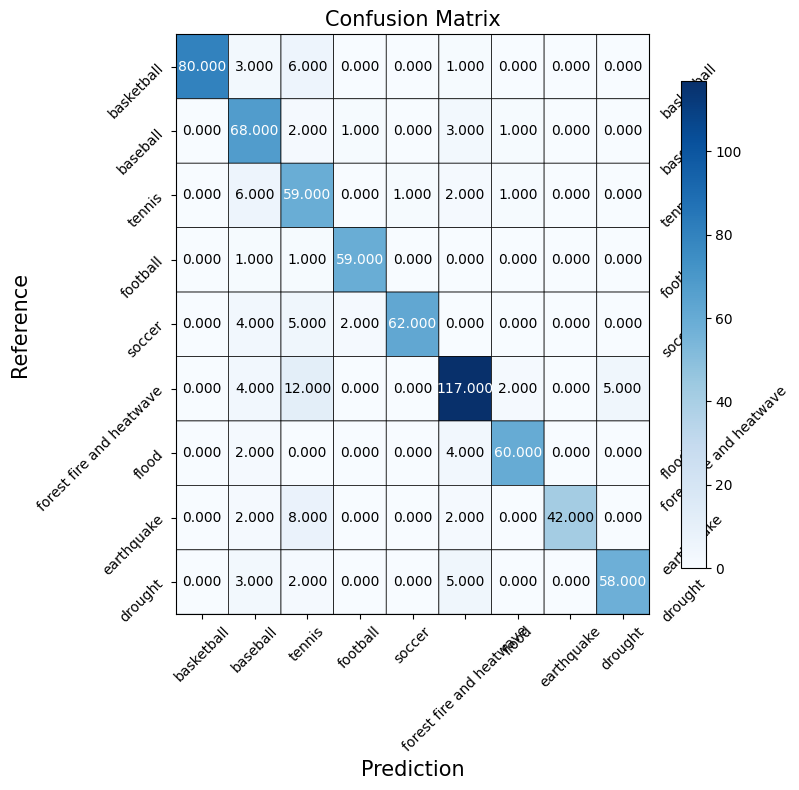




One vs rest merged class balance:

confusion_matrix:
 [[ 84   2   0   2   0   2   0   0   0]
 [  0  71   0   0   0   1   2   0   1]
 [  0  10  55   0   1   2   1   0   0]
 [  0   0   0  60   1   0   0   0   0]
 [  0   4   1   3  64   1   0   0   0]
 [  0   3   7   0   0 122   2   0   6]
 [  0   2   0   0   0   2  62   0   0]
 [  0   4   1   0   0   4   0  45   0]
 [  0   4   0   0   0   6   0   0  58]]
accuracy: 0.8922413793103449
recall: 0.8922413793103449
precision: 0.8922413793103449
f1_score: 0.8922413793103449


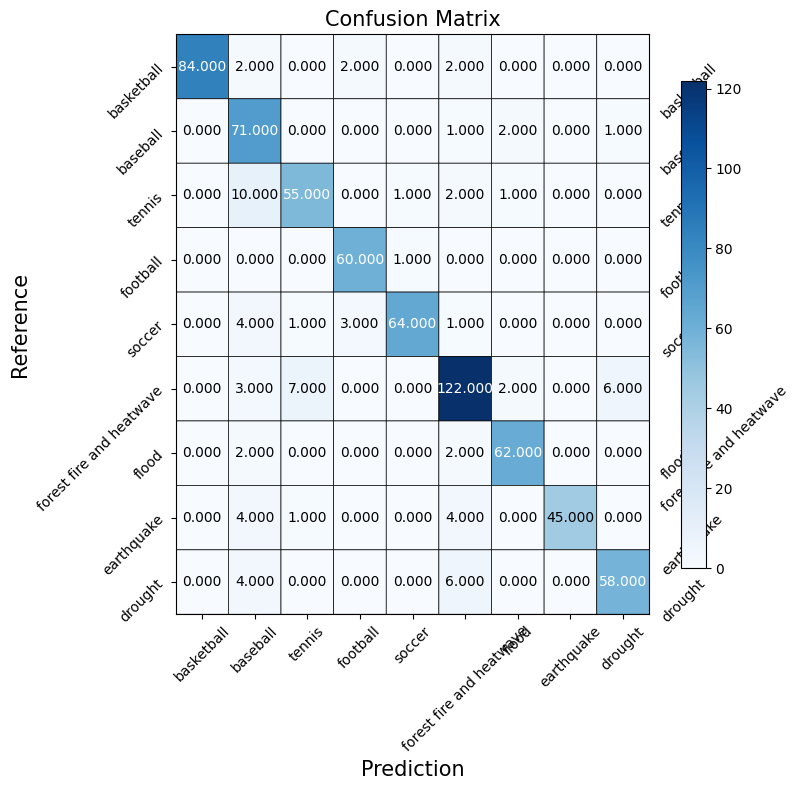

In [ ]:
def class_balance(data, label):
  import random
  label.reset_index()
  delete_list = []
  for i in range(len(data)):
    if label.iloc[i] == 5:
      if random.randint(0, 1):
        delete_list.append(i)
  data = np.delete(data, delete_list, axis=0)
  label = label.drop(label.index[delete_list])
  return data, label
label_list = ['basketball','baseball', 'tennis','football','soccer','forest fire and heatwave','flood','earthquake','drought']
X_train_balance, Y_train_multiclasslabel_balance = class_balance(X_train_LSI, Y_train_multiclasslabel_merged)

mclass_svm_ovo = OneVsOneClassifier(SVC(kernel='linear', random_state=42))
mclass_svm_ovo.fit(X_train_balance, Y_train_multiclasslabel_balance)
Y_test_label_svm = mclass_svm_ovo.predict(X_test_LSI)

caculate_metrics_multiclass(Y_test_multiclasslabel_merged, Y_test_label_svm, label_list, "\nOne-Vs-One merged class balance:")

# One-Vs-Rest Linear SVM with TF-IDF using class weights
mclass_svm_ovr = OneVsRestClassifier(SVC(kernel='linear', random_state=42, class_weight='balanced'))
mclass_svm_ovr.fit(X_train_balance, Y_train_multiclasslabel_balance)
Y_test_label_svm = mclass_svm_ovr.predict(X_test_LSI)

caculate_metrics_multiclass(Y_test_multiclasslabel_merged, Y_test_label_svm, label_list, "\nOne vs rest merged class balance:")



# Word Embedding



## question 10

### Read the paper about GLoVE embeddings - found here and answer the following subquestions:

 • (a) Why are GLoVE embeddings trained on the ratio of co-occurrence probabilities rather than the probabilities themselves?

 • (b) n the two sentences: “James is running in the park.” and “James is running for the presidency.”, would GLoVE embeddings return the same vector for the word running in both cases? Why or why not?

 • (c) What do you expect for the values of, $||GLoVE["woman"] - GLoVE["man"]||^2$, $||GLoVE["wife"] - GLoVE["husband"]||^2$ and $||GLoVE["wife"] - GLoVE["orange"]||^2$ ? Compare these values.

 • (d) Given a word, would you rather stem or lemmatize the word before mapping it to its GLoVE embedding?

• (a) Compared to using probabilities themselves, GLoVE embeddings trained on the ratio of co-occurance can be able to distinguish relevant words from irrelevant words. Moreover, it can also distinguish between the two relevant words

• (b) GLoVE embeddings would not return the same vector for the word running in these two cases because GLoVE returns vectors based on the co-occurance statistics of words and "in the park" and "for the presidency" are different.

• (c) These 3 values represent the Euclidean distance between two words. In general, $||GLoVE["woman"] - GLoVE["man"]||^2$ would be similar to $||GLoVE["wife"] - GLoVE["husband"]||^2$ since they both represent gender relationships. Instead, the value of $||GLoVE["wife"] - GLoVE["orange"]||^2$ will be larger since these two words are irrelevant.

• (d) I would rather choose to lemmatize the word before mapping it to its GLoVE embedding. This is because GLoVE embeddings returns values based on co-occurance and analyzing semantic relationships. Lemmatizing words can help use GLoVE embeddings since it remain words' integrity. .

## question 11
### For the binary classification task distinguishing the “sports” class and “climate” class:

• (a) Describe a feature engineering process that uses GLoVE word embeddings to represent each document. You have to abide by the following rules:

  1) A representation of a text segment needs to have a vector dimension that CANNOT exceed the dimension of the GLoVE embedding used per word of the segment.

  2) You cannot use TF-IDF scores (or any measure that requires looking at the complete dataset) as a pre-processing routine.

  3) Important: In this section, feel free to use raw features from any column in the original data file not just full text. The column keywords might be useful... or not. Make sure that your result achieves an accuracy of at least 92%.

  4) To aggregate these words into a single vector consider normalization the vectors, averaging across the vectors.

• (b) select a classifier model, train and evaluate it with your GLoVE-based feature. If you are doing any cross-validation, please make sure to use a limited set of options so that your code finishes running in a reasonable amount of time.

In [ ]:
dimension_of_glove = 100

embeddings_dict = {}

with open("/content/drive/MyDrive/Colab Notebooks/EE 219/Project1/glove/glove.6B." + str(dimension_of_glove) + "d.txt", 'r') as f: # if 'r' fails with unicode
  for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], "float32")
    embeddings_dict[word] = vector

np.save('/content/drive/MyDrive/Colab Notebooks/EE 219/Project1/glove/wordsList' + str(dimension_of_glove), np.array(list(embeddings_dict.keys())))
np.save('/content/drive/MyDrive/Colab Notebooks/EE 219/Project1/glove/wordVectors'+ str(dimension_of_glove), np.array(list(embeddings_dict.values())))



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

cleaned_data['root_label'] = dataframe['root_label']
cleaned_data['leaf_label'] = dataframe['leaf_label']
cleaned_data['cleaned_keywords']=dataframe['keywords']
train, test = train_test_split(cleaned_data[['cleaned_full_text', 'cleaned_keywords', 'root_label', 'leaf_label']], test_size=0.2, random_state=42)

Y_train_binary = pd.DataFrame()
label_mapping = {'sports': 1, 'climate': 0}
Y_train_binary['root_label'] = train.root_label.map(label_mapping)
Y_train_binary = Y_train_binary.squeeze()

Y_test_binary = pd.DataFrame()
label_mapping = {'sports': 1, 'climate': 0}
Y_test_binary['root_label'] = test.root_label.map(label_mapping)
Y_test_binary = Y_test_binary.squeeze()

def calculate_metrics(Y_label, Y_predict, title):
  print(f"{title}:")
  print(f"confusion_matrix:\n{confusion_matrix(Y_label, Y_predict)}")
  print(f"accuracy:{accuracy_score(Y_label, Y_predict)}")
  print(f"recall:{recall_score(Y_label, Y_predict)}")
  print(f"precision:{precision_score(Y_label, Y_predict)}")
  print(f"f1_score:{f1_score(Y_label, Y_predict)}")
  print(f"\n")

In [ ]:
from tqdm import tqdm
wordsList = np.load('/content/drive/MyDrive/Colab Notebooks/EE 219/Project1/glove/wordsList' + str(dimension_of_glove) + '.npy')
wordVectors = np.load('/content/drive/MyDrive/Colab Notebooks/EE 219/Project1/glove/wordVectors' + str(dimension_of_glove) + '.npy')
wordsList = wordsList.tolist()

def normalize(v):
  norm = np.linalg.norm(v)
  if norm == 0:
      return v
  return v / norm

def calculate_matrix(cleaned_data):
  embedding_list = []
  for i, row in tqdm(cleaned_data.iterrows(), total=cleaned_data.shape[0], desc='Processing'):
    full_embedding = []
    for i in row["cleaned_full_text"].split():
      if i in wordsList:
        full_embedding.append(normalize(wordVectors[wordsList.index(i)]))
    full_embedding = np.array(full_embedding)
    full_embedding = np.average(full_embedding, axis=0)

    keywords_embedding = []
    for j in row["cleaned_keywords"]:
      if j in wordsList:
        keywords_embedding.append(normalize(wordVectors[wordsList.index(j)]))
    keywords_embedding = np.array(keywords_embedding)
    keywords_embedding = np.average(keywords_embedding, axis=0)
    res = np.concatenate((full_embedding, keywords_embedding))
    embedding_list.append(res)
  return np.array(embedding_list)

X_train_300d = calculate_matrix(train)
X_test_300d = calculate_matrix(test)

np.save('/content/drive/MyDrive/Colab Notebooks/EE 219/Project1/glove/X_train_' + str(dimension_of_glove) + 'd', X_train_300d)
np.save('/content/drive/MyDrive/Colab Notebooks/EE 219/Project1/glove/X_test_' + str(dimension_of_glove) + 'd', X_test_300d)

In [ ]:
X_train_300d = np.load('/content/drive/MyDrive/Colab Notebooks/EE 219/Project1/glove/X_train_' + str(dimension_of_glove) + 'd.npy')
X_test_300d = np.load('/content/drive/MyDrive/Colab Notebooks/EE 219/Project1/glove/X_test_' + str(dimension_of_glove) + 'd.npy')

# Cross Validation
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
C_list = [10**(i-3) for i in range(10)]
svm_cv = GridSearchCV(estimator=SVC(kernel='linear', probability=True, random_state=42),
                      param_grid={'C':C_list}, cv=5)
#(*due to the performance problem of the laptop, we can only search the haperparameter from certain numbers such as 0.01, 1, 100,1000,1000)
'''
svm_cv = GridSearchCV(estimator=SVC(kernel='linear', probability=True, random_state=42),
                      param_grid={'C':10**np.arange(-3, 6,dtype=float)}, cv=5)
'''
svm_cv.fit(X_train_300d, Y_train_binary)

import pandas as pd

pd.DataFrame(svm_cv.cv_results_)[['param_C','mean_test_score']]
svm_best = SVC(C=svm_cv.best_params_['C'], kernel='linear', random_state=42)
print(f"best hyperparameter:{svm_cv.best_params_['C']}")
svm_best.fit(X_train_300d, Y_train_binary)

Y_test_label_best = svm_best.predict(X_test_300d)
Y_test_prob_best = svm_best.decision_function(X_test_300d)


calculate_metrics(Y_test_binary, Y_test_label_best, "Best Linear SVMs")


## question 12

### Plot the relationship between the dimension of the pre-trained GLoVE embedding and the resulting accuracy of the model in the classification task. Describe the observed trend. Is this trend expected? Why or why not? In this part use the different sets of GLoVE vectors from the link.

When the dimension of GLoVE word embeddings increase, the resulting classification accuracy of the model increases. This trend is what we expect, as higher-dimensional embeddings have the capacity to capture more nuanced and complex semantic meanings in words.

Dimension=50
Best Linear SVMs:
confusion_matrix:
[[313  15]
 [ 17 351]]
accuracy:0.9540229885057471
recall:0.9538043478260869
precision:0.9590163934426229
f1_score:0.9564032697547683


Dimension=100
Best Linear SVMs:
confusion_matrix:
[[316  12]
 [ 20 348]]
accuracy:0.9540229885057471
recall:0.9456521739130435
precision:0.9666666666666667
f1_score:0.956043956043956


Dimension=200
Best Linear SVMs:
confusion_matrix:
[[323   5]
 [ 20 348]]
accuracy:0.9640804597701149
recall:0.9456521739130435
precision:0.9858356940509915
f1_score:0.9653259361997225


Dimension=300
Best Linear SVMs:
confusion_matrix:
[[323   5]
 [ 18 350]]
accuracy:0.9669540229885057
recall:0.9510869565217391
precision:0.9859154929577465
f1_score:0.9681881051175657




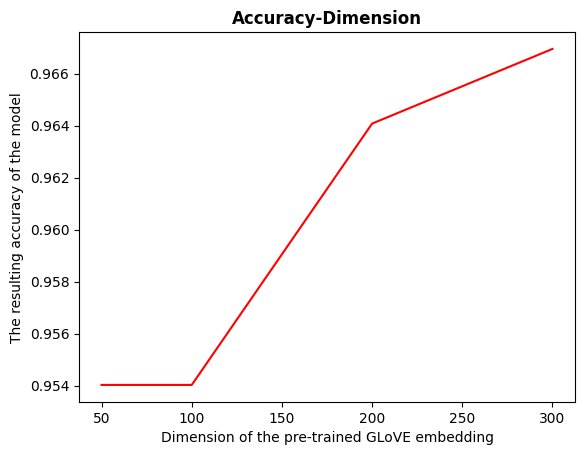

In [ ]:

accuracy = []
dimension_list = [50, 100, 200, 300]
for i in dimension_list:
  print("Dimension=" + str(i))
  X_train_GLoVE = np.load('/content/drive/MyDrive/Colab Notebooks/EE 219/Project1/glove/X_train_' + str(i) + 'd.npy')
  X_test_GLoVE = np.load('/content/drive/MyDrive/Colab Notebooks/EE 219/Project1/glove/X_test_' + str(i) + 'd.npy')
  # Cross Validation
  from sklearn.model_selection import GridSearchCV
  from sklearn.svm import SVC

  svm_best = SVC(C=100, kernel='linear', random_state=42)
  svm_best.fit(X_train_GLoVE, Y_train_binary)

  Y_test_label_best = svm_best.predict(X_test_GLoVE)
  Y_test_prob_best = svm_best.decision_function(X_test_GLoVE)

  calculate_metrics(Y_test_binary, Y_test_label_best, "Best Linear SVMs")
  accuracy.append(accuracy_score(Y_test_binary, Y_test_label_best))

plt.plot(dimension_list, accuracy, color = 'r')
plt.xlabel('Dimension of the pre-trained GLoVE embedding')
plt.ylabel('The resulting accuracy of the model')
plt.title('Accuracy-Dimension', fontweight='bold')
plt.show()




In [ ]:
!pip install umap-learn datashader bokeh holoviews scikit-image colorcet

 ### Visualize the set of normalized GLoVE-based embeddings of the documents with their binary labels in a 2D plane using the UMAP library.

/usr/local/lib/python3.10/dist-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)
/usr/local/lib/python3.10/dist-packages/umap/plot.py:449: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


<Axes: >

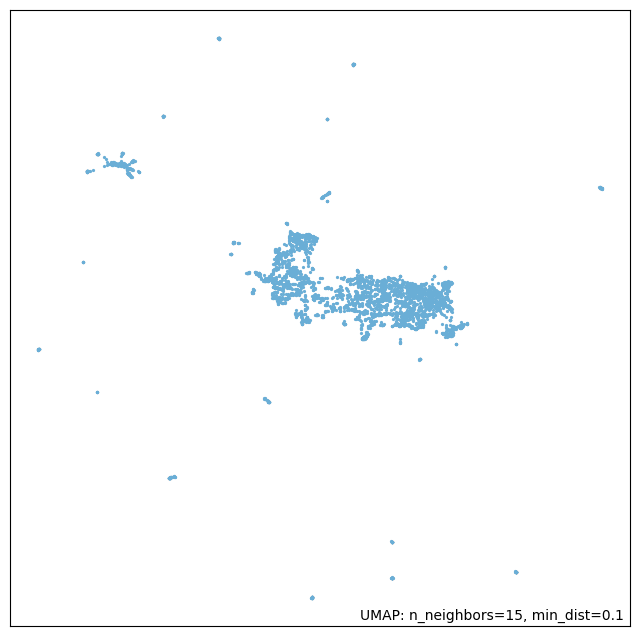

In [ ]:
import sklearn.datasets
import pandas as pd
import numpy as np
import umap
import umap.plot

X_train_300d = np.load('/content/drive/MyDrive/Colab Notebooks/EE 219/Project1/glove/X_train_' + str(300) + 'd.npy')
X_test_300d = np.load('/content/drive/MyDrive/Colab Notebooks/EE 219/Project1/glove/X_test_' + str(300) + 'd.npy')

mapper = umap.UMAP().fit(np.concatenate((X_train_300d, X_test_300d)))

umap.plot.points(mapper)

<Axes: >

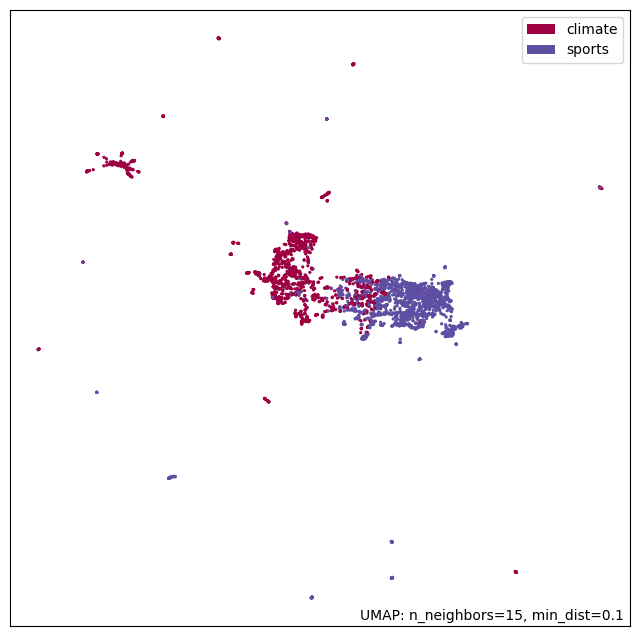

In [ ]:
umap.plot.points(mapper, labels=np.concatenate((train.root_label, test.root_label)))

<Axes: >

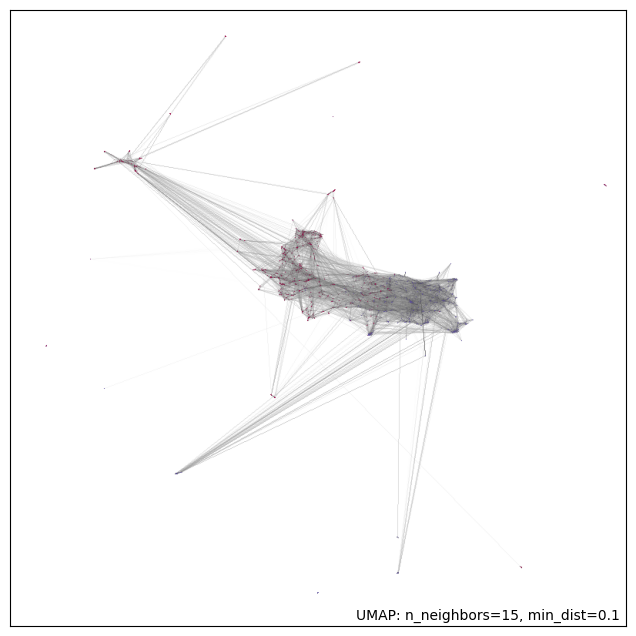

In [ ]:
umap.plot.connectivity(mapper, labels=np.concatenate((Y_train_binary, Y_test_binary)), show_points=True)

 ### Visualize the set of normalized GLoVE-based embeddings of the documents with their binary labels in a 2D plane using the UMAP library. Similarly generate a set of normalized random vectors of the same dimension as GLoVE and visualize these in a 2D plane with UMAP.

/usr/local/lib/python3.10/dist-packages/umap/plot.py:449: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


<Axes: >

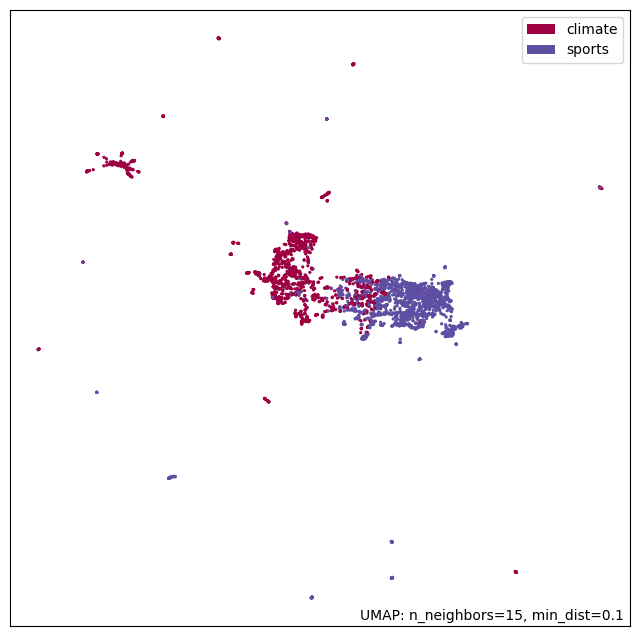

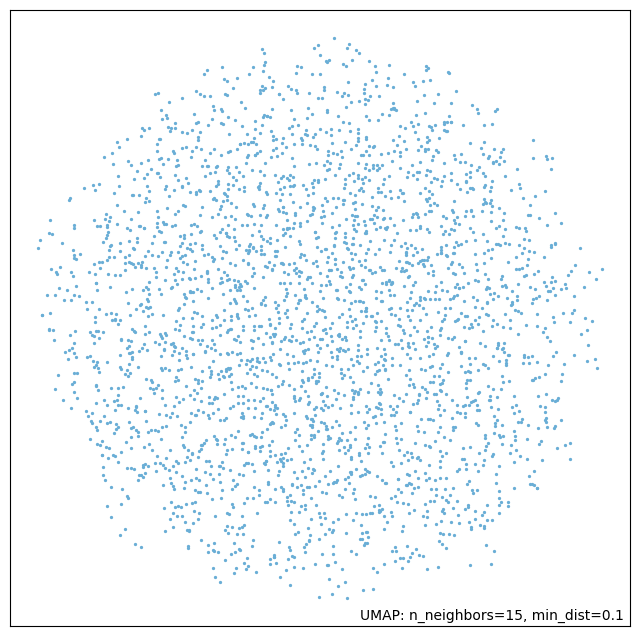

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
random_vector = np.random.random((3000, 600))
def normalize(v):
  norm = np.linalg.norm(v, axis=1)
  return v / np.expand_dims(norm, 1)
random_vector = normalize(random_vector)

mapper_random = umap.UMAP().fit(random_vector)
umap.plot.points(mapper, labels=np.concatenate((train.root_label, test.root_label)))
umap.plot.points(mapper_random)


### Multilabel Visualization

<Axes: >

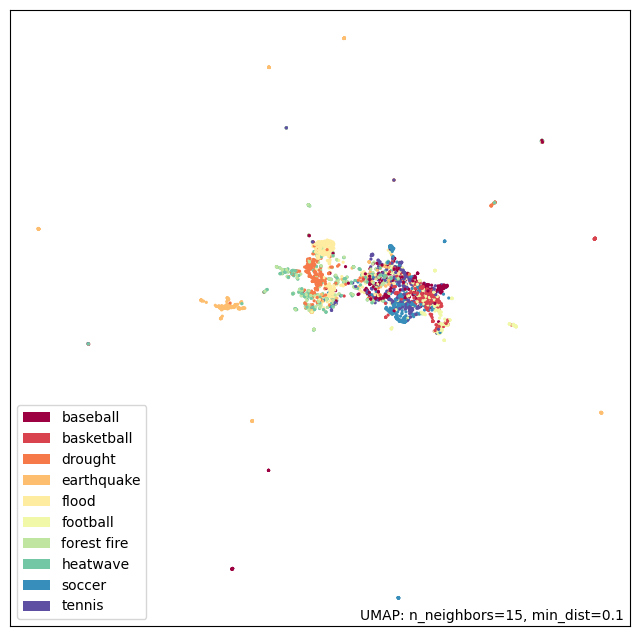

In [ ]:
mapper_multi = umap.UMAP().fit(np.concatenate((X_train_300d, X_test_300d)))
umap.plot.points(mapper_multi, labels=np.concatenate((train.leaf_label, test.leaf_label)))

## question 13


### Compare and contrast the two visualizations. Are there clusters formed in either or both of the plots? We will pursue the clustering aspect further in the next project.

There are 3 clusters formed in the first plot, 2 clusters belong to label "climate", the other 1 cluster belongs to label "sports". There is no significant cluster formation in the second image.